In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import io
import os
from scipy.stats import mannwhitneyu

In [2]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

In [3]:
pangenie_svs_sample = read_vcf("/data/home/tun53987/Hi-C/pangenie_merged_bi_nosnvs_26sample.vcf")

In [4]:
pangenie_svs_sample

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG01114,...,NA20847,HG00171,NA18534,NA18939,HG03683,NA19240,HG03009,HG02018,HG00514,NA19650
0,chr1,811390,.,AATACAATGTTCTCCAGAAATAGTGTCGCAGAAATAAAGACAGAAT...,A,.,PASS,MA=7;UK=123;ID=chr1-811391-DEL-421;AN=52;AF=0;...,GT:GQ,0/0:10000,...,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000
1,chr1,814549,.,C,CCAGAAGAGAAAGTCCAGTCAATTTTATATAAGTTAAAAAAAAGAT...,.,PASS,MA=5;UK=0;ID=chr1-814550-INS-99;AN=52;AF=0.161...,GT:GQ,0/0:12,...,0/0:10000,0/0:3,0/0:10000,0/0:163,0/0:10000,0/0:117,0/0:10000,0/1:78,0/0:180,0/1:4
2,chr1,814682,.,A,AG,.,PASS,MA=5;UK=32;ID=chr1-814683-INS-1;AN=52;AF=1;AC=52,GT:GQ,1/1:10000,...,1/1:10000,1/1:10000,1/1:10000,1/1:10000,1/1:10000,1/1:10000,1/1:10000,1/1:10000,1/1:10000,1/1:10000
3,chr1,816107,.,AG,A,.,PASS,MA=5;UK=48;ID=chr1-816108-DEL-1;AN=52;AF=0.011...,GT:GQ,0/0:10000,...,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000
4,chr1,816976,.,AC,A,.,PASS,MA=2;UK=22;ID=chr1-816977-DEL-1;AN=52;AF=0;AC=0,GT:GQ,0/0:10000,...,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129805,chrX,155693782,.,AT,A,.,PASS,MA=1;UK=59;ID=chrX-155693783-DEL-1;AN=52;AF=0....,GT:GQ,0/0:10000,...,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000,0/0:10000
1129806,chrX,155700291,.,CAA,C,.,PASS,MA=1;UK=30;ID=chrX-155700292-DEL-2;AN=52;AF=0....,GT:GQ,1/1:10000,...,0/1:10000,0/1:46,0/0:10000,0/0:10000,0/0:10000,0/1:10000,0/0:10000,0/1:10000,0/0:10000,0/1:10000
1129807,chrX,155700613,.,G,GTTCTTTTTTTTTTTTTTTTTTTTTTTTTTAGGACTTAAGATTTTA...,.,PASS,MA=2;UK=58;ID=chrX-155700614-INS-55;AN=52;AF=0...,GT:GQ,0/1:13,...,0/1:10000,0/1:10000,0/0:10000,0/0:10000,0/0:10000,0/1:109,0/0:10000,0/1:10000,0/0:10000,0/1:104
1129808,chrX,155700658,.,A,ATGTGCACAT,.,PASS,MA=3;UK=7;ID=chrX-155700659-INS-9;AN=52;AF=0.5...,GT:GQ,1/1:10000,...,0/1:10000,0/1:10000,0/1:61,0/0:152,0/0:79,1/1:10000,0/1:55,0/1:10000,0/0:181,1/1:10000


In [5]:
pangenie_svs_sample[['INFO_ID']] = pangenie_svs_sample['INFO'].str.split(';', expand=True)[2]
pangenie_svs_sample['INFO_ID'] = pangenie_svs_sample['INFO_ID'].str.lstrip('ID=')

In [6]:
pangenie_DEL_sample = pangenie_svs_sample[pangenie_svs_sample['INFO_ID'].str.contains('DEL')]
#pangenie_DEL_sample.to_csv('pangenie/svs/26samples/directory/pangenie_allDEL_sample.csv', index = False, sep='\t', header=True)
pangenie_INS_sample = pangenie_svs_sample[pangenie_svs_sample['INFO_ID'].str.contains('INS')]
#pangenie_INS_sample.to_csv('pangenie/svs/26samples/directory/pangenie_allINS_sample.csv', index = False, sep='\t', header=True)

In [ ]:
## deletions

In [7]:
pangenie_DEL_sample_new = pangenie_DEL_sample[[
 'CHROM','FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650'
     ]]

##### removed NA12329

In [9]:
for col in pangenie_DEL_sample_new.iloc[:, 4:]:
    pangenie_DEL_sample_new[col] = pangenie_DEL_sample_new[col].str[:3]

In [11]:
for col in pangenie_DEL_sample_new.columns:
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('0/0'), col] = '0'
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('.:.'), col] = '0'
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('0/1'), col] = '1'
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('1/0'), col] = '1'
    pangenie_DEL_sample_new.loc[pangenie_DEL_sample_new[col].astype(str).str.startswith('1/1'), col] = '1'

In [26]:
pangenie_DEL_sample_new.iloc[:,4: ] = pangenie_DEL_sample_new.iloc[:,4: ].astype(str).astype(int)
pangenie_DEL_sample_new['Sum']=pangenie_DEL_sample_new.iloc[:,4: ].sum(axis=1)
pangenie_DEL_sample_new_atleast3 = pangenie_DEL_sample_new[pangenie_DEL_sample_new['Sum'].astype(int) >= 5]
pangenie_DEL_sample_new_atleast3['START_POS'] = pangenie_DEL_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[1]
pangenie_DEL_sample_new_atleast3['TYPE'] = pangenie_DEL_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[2]
pangenie_DEL_sample_new_atleast3['LEN'] = pangenie_DEL_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[3]

In [27]:
pangenie_DEL_sample_new_atleast3.iloc[:,[31,33]] = pangenie_DEL_sample_new_atleast3.iloc[:,[31,33]].astype(str).astype(int)
# VCF files in fact are providing a single 1-based position for a variant, end = start + len -1
pangenie_DEL_sample_new_atleast3['END_POS'] = pangenie_DEL_sample_new_atleast3['START_POS'] + pangenie_DEL_sample_new_atleast3['LEN']-1
pangenie_DEL_sample_new_atleast3_new = pangenie_DEL_sample_new_atleast3[[
'CHROM', 'START_POS','END_POS', 'TYPE','LEN', 'FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650', 'Sum'
    ]]

In [28]:
pangenie_DEL_sample_new_atleast3_50 = pangenie_DEL_sample_new_atleast3_new[pangenie_DEL_sample_new_atleast3_new['LEN'] >= 50]
pangenie_DEL_sample_new_atleast3_50.shape

(13876, 35)

In [29]:
pangenie_DEL_sample_new_atleast3_50_zero = pangenie_DEL_sample_new_atleast3_50[pangenie_DEL_sample_new_atleast3_50.iloc[:, 8:].eq(0).any(1)]

In [30]:
#pangenie_DEL_sample_new_atleast3_50_zero.to_csv('pangenie/svs/26samples/directory/pangenie_svs_26sample_ALL_DEL_atleast3_50_genotype_only01.bed', index = False, sep='\t', header=True)

In [31]:
pangenie_DEL_sample_new_atleast3_50_start_end = pangenie_DEL_sample_new_atleast3_50_zero[['CHROM', 'START_POS', 'END_POS', 'INFO_ID']]
pangenie_DEL_sample_new_atleast3_50_start_end.shape

(12670, 4)

In [32]:
#pangenie_DEL_sample_new_atleast3_50_start_end.to_csv('pangenie/svs/26samples/directory/pangenie_svs_26sample_ALL_DEL_atleast3_50_only01.bed', index = False, sep='\t', header=True)

In [ ]:
## insertions

In [33]:
pangenie_INS_sample_new = pangenie_INS_sample[[
 'CHROM','FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650'
     ]]

##### removed NA12329

In [35]:
for col in pangenie_INS_sample_new.iloc[:, 4:]:
    pangenie_INS_sample_new[col] = pangenie_INS_sample_new[col].str[:3]

In [37]:
for col in pangenie_INS_sample_new.columns:
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('0/0'), col] = '0'
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('.:.'), col] = '0'
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('0/1'), col] = '1'
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('1/0'), col] = '1'
    pangenie_INS_sample_new.loc[pangenie_INS_sample_new[col].astype(str).str.startswith('1/1'), col] = '1'

In [39]:
pangenie_INS_sample_new.iloc[:,4: ] = pangenie_INS_sample_new.iloc[:,4: ].astype(str).astype(int)
pangenie_INS_sample_new['Sum']=pangenie_INS_sample_new.iloc[:,4: ].sum(axis=1)
pangenie_INS_sample_new_atleast3 = pangenie_INS_sample_new[pangenie_INS_sample_new['Sum'].astype(int) >= 5]
pangenie_INS_sample_new_atleast3['START_POS'] = pangenie_INS_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[1]
pangenie_INS_sample_new_atleast3['TYPE'] = pangenie_INS_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[2]
pangenie_INS_sample_new_atleast3['LEN'] = pangenie_INS_sample_new_atleast3['INFO_ID'].str.split('-', expand=True)[3]

In [41]:
pangenie_INS_sample_new_atleast3.iloc[:,[31,33]] = pangenie_INS_sample_new_atleast3.iloc[:,[31,33]].astype(str).astype(int)
pangenie_INS_sample_new_atleast3['END_POS'] = pangenie_INS_sample_new_atleast3['START_POS']
pangenie_INS_sample_new_atleast3_new = pangenie_INS_sample_new_atleast3[[
'CHROM', 'START_POS','END_POS', 'TYPE','LEN', 'FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650', 'Sum'
    ]]

In [42]:
pangenie_INS_sample_new_atleast3_50 = pangenie_INS_sample_new_atleast3_new[pangenie_INS_sample_new_atleast3_new['LEN'] >= 50]
pangenie_INS_sample_new_atleast3_50.shape

(19992, 35)

In [43]:
pangenie_INS_sample_new_atleast3_50_zero = pangenie_INS_sample_new_atleast3_50[pangenie_INS_sample_new_atleast3_50.iloc[:, 8:].eq(0).any(1)]
pangenie_INS_sample_new_atleast3_50_zero.shape

(17279, 35)

In [44]:
#pangenie_INS_sample_new_atleast3_50_zero.to_csv('pangenie/svs/26samples/directory/pangenie_svs_26sample_ALL_INS_atleast3_50_genotype_only01.bed', index = False, sep='\t', header=True)

In [45]:
pangenie_INS_sample_new_atleast3_50_start_end = pangenie_INS_sample_new_atleast3_50_zero[['CHROM', 'START_POS', 'END_POS', 'INFO_ID']]
pangenie_INS_sample_new_atleast3_50_start_end.shape

(17279, 4)

In [46]:
#pangenie_INS_sample_new_atleast3_50_start_end.to_csv('pangenie/svs/26samples/directory/pangenie_svs_26sample_ALL_INS_atleast3_50_only01.bed', index = False, sep='\t', header=True)

## SVs' impact on boundary strength

In [47]:
all_DEL_merged = pd.read_csv('deletion/overlapped/boundaries/directory/all_DEL_26merged_cutoff_flank_inter30_5kb_boundaries_100kb_only01.bed', sep='\t', header=None)
all_DEL_merged.columns =['CHROM', 'START_POS', 'END_POS', 'INFO_ID', 'BOUND_CHR', 'FLANK_START', 'FLANK_END', 'BOUND_SCORE']

In [48]:
all_DEL_merged.shape

(12882, 8)

In [49]:
all_INS_merged = pd.read_csv('insertion/overlapped/boundaries/directory/all_INS_26merged_cutoff_flank_inter30_5kb_boundaries_100kb_only01_sum5.bed', sep='\t', header=None)
all_INS_merged.columns =['CHROM', 'START_POS', 'END_POS', 'INFO_ID', 'BOUND_CHR', 'FLANK_START', 'FLANK_END', 'BOUND_SCORE']

In [50]:
all_INS_merged.shape

(17517, 8)

In [51]:
all_DEL_boundary_1 = all_DEL_merged.loc[all_DEL_merged.iloc[:, 4] != '.']
all_DEL_boundary_2 = all_DEL_boundary_1.reset_index(drop=True)

In [52]:
all_DEL_boundary_2

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE
0,chr1,872670,872879,chr1-872670-DEL-210,chr1,840001,895000,0.3857139050960541
1,chr1,964576,964764,chr1-964576-DEL-189,chr1,950001,1005000,0.6052700281143188
2,chr1,964632,964706,chr1-964632-DEL-75,chr1,950001,1005000,0.6052700281143188
3,chr1,976738,977055,chr1-976738-DEL-318,chr1,950001,1005000,0.6052700281143188
4,chr1,977944,978002,chr1-977944-DEL-59,chr1,950001,1005000,0.6052700281143188
...,...,...,...,...,...,...,...,...
4042,chr9,137567227,137567402,chr9-137567227-DEL-176,chr9,137515001,137570000,0.7841394543647766
4043,chr9,137866661,137866746,chr9-137866661-DEL-86,chr9,137830001,137885000,0.3431273400783539
4044,chr9,137866661,137866746,chr9-137866661-DEL-86,chr9,137840001,137895000,0.3431273400783539
4045,chr9,138113751,138113882,chr9-138113751-DEL-132,chr9,138105001,138160000,0.363037496805191


In [53]:
all_INS_boundary_1 = all_INS_merged.loc[all_INS_merged.iloc[:, 4] != '.']
all_INS_boundary_2 = all_INS_boundary_1.reset_index(drop=True)

In [54]:
all_INS_boundary_2

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE
0,chr1,866852,866852,chr1-866852-INS-98,chr1,840001,895000,0.3857139050960541
1,chr1,872567,872567,chr1-872567-INS-420,chr1,840001,895000,0.3857139050960541
2,chr1,876015,876015,chr1-876015-INS-807,chr1,840001,895000,0.3857139050960541
3,chr1,876025,876025,chr1-876025-INS-2312,chr1,840001,895000,0.3857139050960541
4,chr1,977066,977066,chr1-977066-INS-782,chr1,950001,1005000,0.6052700281143188
...,...,...,...,...,...,...,...,...
5507,chr9,137853545,137853545,chr9-137853545-INS-50,chr9,137830001,137885000,0.3431273400783539
5508,chr9,137853545,137853545,chr9-137853545-INS-50,chr9,137840001,137895000,0.3431273400783539
5509,chr9,137874649,137874649,chr9-137874649-INS-78,chr9,137830001,137885000,0.3431273400783539
5510,chr9,137874649,137874649,chr9-137874649-INS-78,chr9,137840001,137895000,0.3431273400783539


In [55]:
sample_merged_BS = pd.read_csv('sample/boundaryscore/directory/BS_cutoff_inter30_10kb.boundaries_100kb.bed', sep='\t', header=None)
sample_merged_BS =sample_merged_BS[[0, 1, 2, 3, 4, 5, 6, 8]]
sample_merged_BS.columns =['BOUND_CHR', 'FLANK_START', 'FLANK_END', 'BOUND_SCORE','BOUND_CHR_samp', 'BOUND_START_samp', 'BOUND_END_samp', 'BOUND_SCORE_samp']
sample_merged_BS_1 = sample_merged_BS.groupby(['BOUND_CHR', 'FLANK_START', 'FLANK_END'], as_index=False)['BOUND_SCORE_samp'].median()
all_INS_boundary_2['HG03732'] = all_INS_boundary_2.merge(sample_merged_BS_1, how="left", left_on=["BOUND_CHR", "FLANK_START", "FLANK_END"], right_on=["BOUND_CHR", "FLANK_START", "FLANK_END"])['BOUND_SCORE_samp']
all_DEL_boundary_2['HG03732'] = all_DEL_boundary_2.merge(sample_merged_BS_1, how="left", left_on=["BOUND_CHR", "FLANK_START", "FLANK_END"], right_on=["BOUND_CHR", "FLANK_START", "FLANK_END"])['BOUND_SCORE_samp']

In [61]:
all_INS_boundary_2

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE,GM18534,GM18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,chr1,866852,866852,chr1-866852-INS-98,chr1,840001,895000,0.385714,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
1,chr1,872567,872567,chr1-872567-INS-420,chr1,840001,895000,0.385714,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
2,chr1,876015,876015,chr1-876015-INS-807,chr1,840001,895000,0.385714,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
3,chr1,876025,876025,chr1-876025-INS-2312,chr1,840001,895000,0.385714,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
4,chr1,977066,977066,chr1-977066-INS-782,chr1,950001,1005000,0.605270,1.296450,0.764313,...,0.900502,1.292665,1.522593,1.216512,1.576817,0.772804,1.101057,0.878213,0.845969,0.627010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,chr9,137853545,137853545,chr9-137853545-INS-50,chr9,137830001,137885000,0.343127,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
5508,chr9,137853545,137853545,chr9-137853545-INS-50,chr9,137840001,137895000,0.343127,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
5509,chr9,137874649,137874649,chr9-137874649-INS-78,chr9,137830001,137885000,0.343127,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
5510,chr9,137874649,137874649,chr9-137874649-INS-78,chr9,137840001,137895000,0.343127,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201


In [63]:
all_DEL_boundary_2

,CHROM,START_POS,END_POS,INFO_ID,BOUND_CHR,FLANK_START,FLANK_END,BOUND_SCORE,GM18534,GM18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,chr1,872670,872879,chr1-872670-DEL-210,chr1,840001,895000,0.385714,NaN,NaN,...,0.996942,0.787516,0.514748,0.748621,1.578724,0.548503,1.163384,0.496668,0.653586,1.259102
1,chr1,964576,964764,chr1-964576-DEL-189,chr1,950001,1005000,0.605270,1.296450,0.764313,...,0.900502,1.292665,1.522593,1.216512,1.576817,0.772804,1.101057,0.878213,0.845969,0.627010
2,chr1,964632,964706,chr1-964632-DEL-75,chr1,950001,1005000,0.605270,1.296450,0.764313,...,0.900502,1.292665,1.522593,1.216512,1.576817,0.772804,1.101057,0.878213,0.845969,0.627010
3,chr1,976738,977055,chr1-976738-DEL-318,chr1,950001,1005000,0.605270,1.296450,0.764313,...,0.900502,1.292665,1.522593,1.216512,1.576817,0.772804,1.101057,0.878213,0.845969,0.627010
4,chr1,977944,978002,chr1-977944-DEL-59,chr1,950001,1005000,0.605270,1.296450,0.764313,...,0.900502,1.292665,1.522593,1.216512,1.576817,0.772804,1.101057,0.878213,0.845969,0.627010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042,chr9,137567227,137567402,chr9-137567227-DEL-176,chr9,137515001,137570000,0.784139,0.574286,1.661895,...,1.143875,0.794576,1.403225,0.854702,1.378649,0.839391,0.767168,1.294633,0.992430,1.131538
4043,chr9,137866661,137866746,chr9-137866661-DEL-86,chr9,137830001,137885000,0.343127,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
4044,chr9,137866661,137866746,chr9-137866661-DEL-86,chr9,137840001,137895000,0.343127,0.201470,0.272485,...,0.618370,0.633099,NaN,1.078382,0.292997,0.658104,1.048833,0.633260,NaN,0.568201
4045,chr9,138113751,138113882,chr9-138113751-DEL-132,chr9,138105001,138160000,0.363037,1.022963,0.680711,...,0.968240,0.772438,NaN,1.020497,1.149689,1.572460,NaN,0.979381,0.674705,0.703455


In [64]:
#all_INS_boundary_2.to_csv('directory/all_INS_merged_BS_flank_26sample_only01.bed', index = False, sep='\t', header=True)
#all_DEL_boundary_2.to_csv('directory/all_DEL_merged_BS_flank_26sample_only01.bed', index = False, sep='\t', header=True)

#### Mann-Whitney U test for genotypes and boundary BS

In [65]:
# Replace NaN Values with Zeros, because those NA boundary scores mean there is no boundary, so we can changed them to zero
all_DEL_boundary_3 = all_DEL_boundary_2.fillna(0).drop_duplicates()
all_DEL_boundary_3.shape

(4047, 34)

In [66]:
# Replace NaN Values with Zeros
all_INS_boundary_3 = all_INS_boundary_2.fillna(0).drop_duplicates()
all_INS_boundary_3.shape

(5512, 34)

In [67]:
all_DEL_boundary_id = list(all_DEL_boundary_3['INFO_ID'])
DEL_list = list(set(all_DEL_boundary_id))
len(DEL_list)

3835

In [68]:
all_INS_boundary_id = list(all_INS_boundary_3['INFO_ID'])
INS_list = list(set(all_INS_boundary_id))
len(INS_list)

5274

In [70]:
DEL_genotype = pd.read_csv('directory/pangenie_svs_26sample_ALL_DEL_atleast3_50_genotype_only01.bed', sep='\t', header=0)
INS_genotype = pd.read_csv('directory/pangenie_svs_26sample_ALL_INS_atleast3_50_genotype_only01.bed', sep='\t', header=0)

In [71]:
DEL_genotype_1 = DEL_genotype.iloc[:, :-1]
INS_genotype_1 = INS_genotype.iloc[:, :-1]
DEL_boundary_genotype = DEL_genotype_1[DEL_genotype_1['INFO_ID'].isin(all_DEL_boundary_id)]
INS_boundary_genotype = INS_genotype_1[INS_genotype_1['INFO_ID'].isin(all_INS_boundary_id)]

In [72]:
DEL_boundary_genotype = DEL_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]
INS_boundary_genotype = INS_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [73]:
DEL_boundary_genotype_1 = DEL_boundary_genotype.reset_index(drop=True)
DEL_boundary_genotype_1.shape

(3835, 34)

In [74]:
INS_boundary_genotype_1 = INS_boundary_genotype.reset_index(drop=True)
INS_boundary_genotype_1.shape

(5274, 34)

In [75]:
### test for genotypes 0 and 1 (binary genotypes, only 0/0 and others)
pvalue= []

for i in range(0, len(all_DEL_boundary_3)):
    DEL_boundary_genotype_all = DEL_boundary_genotype_1[DEL_boundary_genotype_1.loc[:,'INFO_ID'] == all_DEL_boundary_3.loc[i,'INFO_ID']].iloc[:,8:]
    genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
    boundary_score_list = all_DEL_boundary_3.iloc[i,8:34].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'boundary_score' : boundary_score_list})
    
    df_new = df.assign(BS=df.groupby('genotypes').cumcount()).pivot('BS','genotypes','boundary_score')
      
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        print (p)
        
    except ValueError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
all_DEL_boundary_3['pvalue_0_1'] = pvalue

0.12094861660079052
0.14350354451040948
0.94
0.4290301003344481
0.09049623145732985
0.9550015202189113
0.9725752508361202
0.3635056248099726
0.17759197324414716
0.5727403031750857
0.3076923076923077
0.05538461538461538
0.07721582496114734
0.05358120140728836
0.8501368197020371
0.9550015202189113
0.6511766494375189
0.514515050167224
0.18824566737610213
0.9783104767086463
0.9550015202189113
0.6108452417148068
0.8501368197020371
0.9188168508029861
0.17759197324414716
0.6307851765948413
0.569474004256613
0.5604495894467627
0.6227355092074436
0.6831780576403003
0.1496471491894833
0.21708118910299554
0.8994752373753585
0.6978819538248803
0.09524571538301516
0.3076923076923077
1.0
0.879846547314578
0.7777135907570688
0.164176601430606
0.39136666268177916
0.45702992659514396
0.5966952041093918
0.8200900835602679
0.004458877372459281
0.023298440689745036
0.6340196188251108
0.7211036271576049
0.7211036271576049
0.07692307692307693
0.24056169970828745
0.23071754332623895
0.07692307692307693
0.838

In [76]:
#all_DEL_boundary_3.to_csv('directory/final_ALL_DEL_merged_BS_flank_26sample_pvalue_only01_fillna.bed', index = False, sep='\t', header=True)

In [77]:
### test for genotypes 0 and 1 (binary genotypes, only 0/0 and others)
pvalue= []

for i in range(0, len(all_INS_boundary_3)):
    INS_boundary_genotype_all = INS_boundary_genotype_1[INS_boundary_genotype_1.loc[:,'INFO_ID'] == all_INS_boundary_3.loc[i,'INFO_ID']].iloc[:,8:]
    genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
    boundary_score_list = all_INS_boundary_3.iloc[i,8:34].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'boundary_score' : boundary_score_list})
    
    df_new = df.assign(BS=df.groupby('genotypes').cumcount()).pivot('BS','genotypes','boundary_score')
      
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        print (p)
        
    except ValueError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
all_INS_boundary_3['pvalue_0_1'] = pvalue

0.8997871693523868
0.6340196188251108
1.0
0.26337552607575493
0.6831780576403003
0.10891883725374102
0.08283021326499586
1.0
0.6831780576403003
0.7810099713182227
0.12082561065263987
0.5787671865084707
0.3243973417886461
0.4214828649611258
0.4517808211441272
0.40254677614752993
0.5307823526587829
0.6460836948755916
0.7623076923076924
0.6923076923076923
0.959817702824837
0.9783104767086463
0.027859097424314812
0.9395899644842974
0.569474004256613
0.9350223232145431
0.8357729227294444
0.04073674609143717
0.9381755678700087
0.17759197324414716
0.9381755678700087
0.35512313773183335
0.9798432338962693
0.7777135907570688
1.0
0.8861538461538463
0.30153846153846153
0.3446153846153846
0.39384615384615385
0.49401327438209924
0.6672539010323368
0.3474456651169533
0.30153846153846153
0.3446153846153846
0.39384615384615385
0.15700820918212222
0.49419276375798116
0.49419276375798116
0.8997871693523868
0.9350223232145431
0.3953846153846154
0.24056169970828745
0.9798432338962693
0.22327759197324415
0

In [78]:
#all_INS_boundary_3.to_csv('directory/final_ALL_INS_merged_BS_flank_26sample_pvalue_only01_fillna.bed', index = False, sep='\t', header=True)

## SVs that overlapped with SV-eQTLs and SV-sQTLs' impact on boundary strength

In [80]:
eqtl = pd.read_csv('/data/home/tun53987/Hi-C/TAD_SV_qtl/qtl_results_all_v4_fdr0.05.txt', sep='\t')
qtl_DEL = eqtl[eqtl['type'] == 'DEL']
qtl_INS = eqtl[eqtl['type'] == 'INS']
qtl_DEL_snp_id = list(qtl_DEL['snp_id'])
qtl_INS_snp_id = list(qtl_INS['snp_id'])

In [81]:
len(qtl_DEL_snp_id)

34745

In [82]:
len(qtl_INS_snp_id)

25516

In [83]:
sqtl = pd.read_csv('/data/home/tun53987/Hi-C/TAD_SV_qtl/qtl_results_all_v2_fdr0.05.txt', sep = '\t')
sqtl_DEL = sqtl[sqtl['type'] == 'DEL']
sqtl_INS = sqtl[sqtl['type'] == 'INS']
sqtl_DEL_snp_id = list(sqtl_DEL['snp_id'])
sqtl_INS_snp_id = list(sqtl_INS['snp_id'])

In [84]:
len(sqtl_DEL)

44945

In [85]:
len(sqtl_INS)

33950

In [ ]:
## deletions

In [86]:
pangenie_svs_sample_DEL = pangenie_svs_sample[(pangenie_svs_sample['INFO_ID'].isin(qtl_DEL_snp_id))&(pangenie_svs_sample['INFO_ID'].isin(sqtl_DEL_snp_id))]

In [87]:
pangenie_svs_sample_DEL_new = pangenie_svs_sample_DEL[[
 'CHROM','FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650'
     ]]

##### removed NA12329

In [89]:
for col in pangenie_svs_sample_DEL_new.iloc[:, 4:]:
    pangenie_svs_sample_DEL_new[col] = pangenie_svs_sample_DEL_new[col].str[:3]

In [90]:
col_list = pangenie_svs_sample_DEL_new.iloc[:, 4:].values.tolist()
flat_list = [item for sublist in col_list for item in sublist]
pd.Series(flat_list).value_counts()

0/0    119175
0/1     77208
1/1     40206
1/0       421
.:.         6
dtype: int64

In [92]:
for col in pangenie_svs_sample_DEL_new.columns:
    pangenie_svs_sample_DEL_new.loc[pangenie_svs_sample_DEL_new[col].astype(str).str.startswith('0/0'), col] = '0'
    pangenie_svs_sample_DEL_new.loc[pangenie_svs_sample_DEL_new[col].astype(str).str.startswith('.:.'), col] = '0'
    pangenie_svs_sample_DEL_new.loc[pangenie_svs_sample_DEL_new[col].astype(str).str.startswith('0/1'), col] = '1'
    pangenie_svs_sample_DEL_new.loc[pangenie_svs_sample_DEL_new[col].astype(str).str.startswith('1/0'), col] = '1'
    pangenie_svs_sample_DEL_new.loc[pangenie_svs_sample_DEL_new[col].astype(str).str.startswith('1/1'), col] = '1'

In [94]:
pangenie_svs_sample_DEL_new.iloc[:,4: ] = pangenie_svs_sample_DEL_new.iloc[:,4: ].astype(str).astype(int)
pangenie_svs_sample_DEL_new['Sum']=pangenie_svs_sample_DEL_new.iloc[:,4: ].sum(axis=1)
pangenie_svs_sample_DEL_atleast3 = pangenie_svs_sample_DEL_new[pangenie_svs_sample_DEL_new['Sum'] >= 5]
pangenie_svs_sample_DEL_atleast3['START_POS'] = pangenie_svs_sample_DEL_atleast3['INFO_ID'].str.split('-', expand=True)[1]
pangenie_svs_sample_DEL_atleast3['TYPE'] = pangenie_svs_sample_DEL_atleast3['INFO_ID'].str.split('-', expand=True)[2]
pangenie_svs_sample_DEL_atleast3['LEN'] = pangenie_svs_sample_DEL_atleast3['INFO_ID'].str.split('-', expand=True)[3]

In [96]:
pangenie_svs_sample_DEL_atleast3.iloc[:,[31,33]] = pangenie_svs_sample_DEL_atleast3.iloc[:,[31,33]].astype(str).astype(int)
# VCF files in fact are providing a single 1-based position for a variant, len = end-start + 1
pangenie_svs_sample_DEL_atleast3['END_POS'] = pangenie_svs_sample_DEL_atleast3['START_POS'] + pangenie_svs_sample_DEL_atleast3['LEN']-1

In [97]:
pangenie_svs_sample_DEL_atleast3_new = pangenie_svs_sample_DEL_atleast3[[
'CHROM', 'START_POS','END_POS', 'TYPE','LEN', 'FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650', 'Sum'
    ]]

In [98]:
pangenie_svs_sample_DEL_atleast3_50 = pangenie_svs_sample_DEL_atleast3_new[pangenie_svs_sample_DEL_atleast3_new['LEN'] >= 50]
pangenie_svs_sample_DEL_atleast3_50.shape

(235, 35)

In [99]:
pangenie_svs_sample_DEL_atleast3_50_zero = pangenie_svs_sample_DEL_atleast3_50[pangenie_svs_sample_DEL_atleast3_50.iloc[:, 8:].eq(0).any(1)]
#pangenie_svs_sample_DEL_atleast3_50_zero.to_csv('SV_eqtl_sqtl/directory/pangenie_svs_26sample_ALL_DEL_atleast3_50_genotype_only01_esqtl.bed', index = False, sep='\t', header=True)
pangenie_svs_sample_DEL_atleast3_50_zero.shape

(228, 35)

In [100]:
pangenie_svs_sample_DEL_atleast3_50_start_end = pangenie_svs_sample_DEL_atleast3_50_zero[['CHROM', 'START_POS', 'END_POS', 'INFO_ID']]
pangenie_svs_sample_DEL_atleast3_50_start_end.shape

(228, 4)

In [ ]:
## insertion

In [101]:
pangenie_svs_sample_INS = pangenie_svs_sample[(pangenie_svs_sample['INFO_ID'].isin(qtl_INS_snp_id))&(pangenie_svs_sample['INFO_ID'].isin(sqtl_INS_snp_id))]

In [107]:
pangenie_svs_sample_INS = pangenie_svs_sample_INS[[
 'CHROM','FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650'
     ]]

##### removed NA12329

In [109]:
for col in pangenie_svs_sample_INS.columns:
    pangenie_svs_sample_INS.loc[pangenie_svs_sample_INS[col].astype(str).str.startswith('0/0'), col] = 0
    pangenie_svs_sample_INS.loc[pangenie_svs_sample_INS[col].astype(str).str.startswith('.:.'), col] = 0
    pangenie_svs_sample_INS.loc[pangenie_svs_sample_INS[col].astype(str).str.startswith('0/1'), col] = 1
    pangenie_svs_sample_INS.loc[pangenie_svs_sample_INS[col].astype(str).str.startswith('1/0'), col] = 1
    pangenie_svs_sample_INS.loc[pangenie_svs_sample_INS[col].astype(str).str.startswith('1/1'), col] = 1

In [111]:
pangenie_svs_sample_INS.iloc[:,4: ] = pangenie_svs_sample_INS.iloc[:,4: ].astype(str).astype(int)
pangenie_svs_sample_INS['Sum']=pangenie_svs_sample_INS.iloc[:,4: ].sum(axis=1)
pangenie_svs_sample_INS_atleast3 = pangenie_svs_sample_INS[pangenie_svs_sample_INS['Sum'] >= 5]
pangenie_svs_sample_INS_atleast3['START_POS'] = pangenie_svs_sample_INS_atleast3['INFO_ID'].str.split('-', expand=True)[1]
pangenie_svs_sample_INS_atleast3['TYPE'] = pangenie_svs_sample_INS_atleast3['INFO_ID'].str.split('-', expand=True)[2]
pangenie_svs_sample_INS_atleast3['LEN'] = pangenie_svs_sample_INS_atleast3['INFO_ID'].str.split('-', expand=True)[3]

In [113]:
pangenie_svs_sample_INS_atleast3.iloc[:,[31,33]] = pangenie_svs_sample_INS_atleast3.iloc[:,[31,33]].astype(str).astype(int)
pangenie_svs_sample_INS_atleast3['END_POS'] = pangenie_svs_sample_INS_atleast3['START_POS']

In [114]:
pangenie_svs_sample_INS_atleast3_new = pangenie_svs_sample_INS_atleast3[[
'CHROM', 'START_POS','END_POS', 'TYPE','LEN', 'FILTER', 'INFO_ID', 'FORMAT', 'HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650', 'Sum'
    ]]

In [115]:
pangenie_svs_sample_INS_atleast3_50 = pangenie_svs_sample_INS_atleast3_new[pangenie_svs_sample_INS_atleast3_new['LEN'] >= 50]
pangenie_svs_sample_INS_atleast3_50.shape

(258, 35)

In [116]:
pangenie_svs_sample_INS_atleast3_50_zero = pangenie_svs_sample_INS_atleast3_50[pangenie_svs_sample_INS_atleast3_50.iloc[:, 8:].eq(0).any(1)]
#pangenie_svs_sample_INS_atleast3_50_zero.to_csv('SV_eqtl_sqtl/directory/pangenie_svs_26sample_ALL_INS_atleast3_50_genotype_only01_esqtl.bed', index = False, sep='\t', header=True)
pangenie_svs_sample_INS_atleast3_50_zero.shape

(250, 35)

In [117]:
pangenie_svs_sample_INS_atleast3_50_start_end = pangenie_svs_sample_INS_atleast3_50_zero[['CHROM', 'START_POS', 'START_POS', 'INFO_ID']]
pangenie_svs_sample_INS_atleast3_50_start_end.shape

(250, 4)

In [118]:
all_DEL_merged = pd.read_csv('SV_eqtl_sqtl/directory/all_DEL_26merged_cutoff_flank_inter30_5kb_boundaries_100kb_only01_esqtl_sum5.bed', sep='\t', header=None)
all_DEL_merged.columns =['CHROM', 'START_POS', 'END_POS', 'INFO_ID', 'BOUND_CHR', 'FLANK_START', 'FLANK_END', 'BOUND_SCORE']
all_INS_merged = pd.read_csv('SV_eqtl_sqtl/directory/all_INS_26merged_cutoff_flank_inter30_5kb_boundaries_100kb_only01_esqtl_sum5.bed', sep='\t', header=None)
all_INS_merged.columns =['CHROM', 'START_POS', 'END_POS', 'INFO_ID', 'BOUND_CHR', 'FLANK_START', 'FLANK_END', 'BOUND_SCORE']

In [119]:
all_DEL_merged.shape

(244, 8)

In [120]:
all_INS_merged.shape

(261, 8)

In [121]:
all_DEL_boundary_1 = all_DEL_merged.loc[all_DEL_merged.iloc[:, 4] != '.']
all_DEL_boundary_2 = all_DEL_boundary_1.reset_index(drop=True)
all_INS_boundary_1 = all_INS_merged.loc[all_INS_merged.iloc[:, 4] != '.']
all_INS_boundary_2 = all_INS_boundary_1.reset_index(drop=True)

## add the boundary score for each sample 

In [122]:
sample_merged_BS = pd.read_csv('/home/tun53987/Hi-C/experiment_HG03732/aligned/fanc_insulation_SCALE/BS_cutoff_inter30_10kb.boundaries_100kb.bed', sep='\t', header=None)
sample_merged_BS =sample_merged_BS[[0, 1, 2, 3, 4, 5, 6, 8]]
sample_merged_BS.columns =['BOUND_CHR', 'FLANK_START', 'FLANK_END', 'BOUND_SCORE','BOUND_CHR_samp', 'BOUND_START_samp', 'BOUND_END_samp', 'BOUND_SCORE_samp']
sample_merged_BS_1 = sample_merged_BS.groupby(['BOUND_CHR', 'FLANK_START', 'FLANK_END'], as_index=False)['BOUND_SCORE_samp'].median()
all_INS_boundary_2['HG03732'] = all_INS_boundary_2.merge(sample_merged_BS_1, how="left", left_on=["BOUND_CHR", "FLANK_START", "FLANK_END"], right_on=["BOUND_CHR", "FLANK_START", "FLANK_END"])['BOUND_SCORE_samp']
all_DEL_boundary_2['HG03732'] = all_DEL_boundary_2.merge(sample_merged_BS_1, how="left", left_on=["BOUND_CHR", "FLANK_START", "FLANK_END"], right_on=["BOUND_CHR", "FLANK_START", "FLANK_END"])['BOUND_SCORE_samp']

In [134]:
# Replace NaN Values with Zeros, because those NA boundary scores mean there is no boundary, so we can changed them to zero
all_DEL_boundary_3 = all_DEL_boundary_2.fillna(0).drop_duplicates()
all_DEL_boundary_3.shape

(129, 34)

In [135]:
# Replace NaN Values with Zeros
all_INS_boundary_3 = all_INS_boundary_2.fillna(0).drop_duplicates()
all_INS_boundary_3.shape

(131, 34)

In [136]:
all_DEL_boundary_id = list(all_DEL_boundary_3['INFO_ID'])
DEL_list = list(set(all_DEL_boundary_id))
len(DEL_list)

113

In [137]:
all_INS_boundary_id = list(all_INS_boundary_3['INFO_ID'])
INS_list = list(set(all_INS_boundary_id))
len(INS_list)

120

In [138]:
DEL_genotype = pd.read_csv('SV_eqtl_sqtl/directory/pangenie_svs_26sample_ALL_DEL_atleast3_50_genotype_only01_esqtl.bed', sep='\t', header=0)
INS_genotype = pd.read_csv('SV_eqtl_sqtl/directory/pangenie_svs_26sample_ALL_INS_atleast3_50_genotype_only01_esqtl.bed', sep='\t', header=0)

In [139]:
DEL_genotype_1 = DEL_genotype.iloc[:, :-1]
INS_genotype_1 = INS_genotype.iloc[:, :-1]
DEL_boundary_genotype = DEL_genotype_1[DEL_genotype_1['INFO_ID'].isin(all_DEL_boundary_id)]
INS_boundary_genotype = INS_genotype_1[INS_genotype_1['INFO_ID'].isin(all_INS_boundary_id)]

In [140]:
DEL_boundary_genotype = DEL_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]
INS_boundary_genotype = INS_boundary_genotype[[
'CHROM', 'START_POS', 'END_POS', 'TYPE', 'LEN', 'FILTER', 'INFO_ID','FORMAT','NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [141]:
DEL_boundary_genotype_1 = DEL_boundary_genotype.reset_index(drop=True)
DEL_boundary_genotype_1.shape

(113, 34)

In [142]:
INS_boundary_genotype_1 = INS_boundary_genotype.reset_index(drop=True)
INS_boundary_genotype_1.shape

(120, 34)

In [143]:
### test for genotypes 0 and 1 (binary genotypes, only 0/0 and others)
pvalue= []

for i in range(0, len(all_DEL_boundary_3)):
    DEL_boundary_genotype_all = DEL_boundary_genotype_1[DEL_boundary_genotype_1.loc[:,'INFO_ID'] == all_DEL_boundary_3.loc[i,'INFO_ID']].iloc[:,8:]
    genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
    boundary_score_list = all_DEL_boundary_3.iloc[i,8:34].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'boundary_score' : boundary_score_list})
    
    df_new = df.assign(BS=df.groupby('genotypes').cumcount()).pivot('BS','genotypes','boundary_score')
      
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        print (p)
        
    except ValueError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
all_DEL_boundary_3['pvalue_0_1'] = pvalue

0.514515050167224
0.4579942711750492
0.9350223232145431
0.04698788625562081
0.7916147925301243
0.8861538461538463
0.959817702824837
0.6460836948755916
0.757859531772575
0.7596622384211562
0.19816390030752665
0.19816390030752665
0.2783520826999088
0.8997871693523868
0.3635056248099726
0.88
0.5267107075183532
0.7897406940885201
0.9999999999999999
0.7897406940885201
0.003392488518346642
0.8010337488598358
0.3565494372366092
0.5335603526907874
0.24278426244639736
0.8596162647421228
0.8596162647421228
0.26421110320558433
0.94
0.6340196188251108
0.7526299787169353
0.9999999999999998
0.4706354515050167
0.34013377926421406
0.88
0.13499054452076395
0.13499054452076395
0.13499054452076395
0.5511927835255337
0.7113363524347506
1.0
0.734718759501368
0.5384615384615385
0.7692307692307692
0.26083115968699494
0.8822742474916387
0.6153846153846154
0.6153846153846154
0.27398096855358933
0.9793696409930089
0.8997871693523868
0.7596622384211562
0.5603616520778992
1.0
0.19608839672912898
0.957876174169080

In [144]:
#all_DEL_boundary_3.to_csv('SV_eqtl_sqtl/directory/final_ALL_DEL_merged_BS_flank_26sample_ori_pvalue_only01_fillna_esqtl_sum5.bed', index = False, sep='\t', header=True)

In [145]:
### test for genotypes 0 and 1 (binary genotypes, only 0/0 and others)
pvalue= []

for i in range(0, len(all_INS_boundary_3)):
    INS_boundary_genotype_all = INS_boundary_genotype_1[INS_boundary_genotype_1.loc[:,'INFO_ID'] == all_INS_boundary_3.loc[i,'INFO_ID']].iloc[:,8:]
    genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
    boundary_score_list = all_INS_boundary_3.iloc[i,8:34].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'boundary_score' : boundary_score_list})
    
    df_new = df.assign(BS=df.groupby('genotypes').cumcount()).pivot('BS','genotypes','boundary_score')
      
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        print (p)
        
    except ValueError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
all_INS_boundary_3['pvalue_0_1'] = pvalue

0.4517808211441272
0.2409230129138596
0.959817702824837
0.49401327438209924
0.5604495894467627
0.14350354451040948
0.12852282728712933
0.12852282728712933
0.5511927835255337
0.036227051989604145
0.297232881534941
0.06334752204317422
0.2542110063849194
0.06334752204317422
0.544604349749053
0.4517808211441272
0.7759950374030332
0.30153846153846153
0.08492705302504737
0.8490886687683028
0.7113363524347506
0.4184129761744515
0.058200380854843095
0.13499054452076395
0.8563552210341819
0.16920644572818483
0.7424463381550472
0.21708118910299554
0.9578761741690804
0.910142900577683
0.9798432338962693
0.5335603526907874
0.1823844751291245
0.03692307692307692
0.21627050295242514
1.0
0.6108452417148068
0.4623873178914234
0.8994752373753585
0.6832167596839828
0.7810099713182227
0.2954263128176171
0.8971264567980143
0.011103038837592612
1.0
0.23785697140388215
1.0
0.7596622384211562
0.5267107075183532
0.5267107075183532
0.46153846153846156
0.06842434722364726
0.6978819538248803
0.4579942711750492
0

In [146]:
#all_INS_boundary_3.to_csv('SV_eqtl_sqtl/directory/final_ALL_INS_merged_BS_flank_26sample_ori_pvalue_only01_fillna_esqtl_sum5.bed', index = False, sep='\t', header=True)

In [ ]:
## visualization of chr8-644401-DEL-5014 and chr6-130293639-INS-295

In [215]:
#all_DEL_boundary_3.iloc[117]
all_INS_boundary_3.iloc[106]

CHROM                            chr6
START_POS                   130293639
END_POS                     130293639
INFO_ID        chr6-130293639-INS-295
BOUND_CHR                        chr6
FLANK_START                 130285001
FLANK_END                   130340000
BOUND_SCORE                  0.627667
GM18534                      1.496878
GM18939                      1.035841
GM19036                      1.278156
GM19240                      0.857285
GM19650                      0.911094
GM19833                      0.864012
GM20509                      1.175681
GM20847                      0.624757
HG00096                      0.933389
HG00171                      0.905081
HG00514                      1.167713
HG00733                      0.621989
HG00864                      1.032443
HG01114                      1.324138
HG01505                      0.616816
HG01573                      0.840629
HG01596                      1.236348
HG02011                      1.410939
HG02018     

In [216]:
#boundary_score_list = all_DEL_boundary_3.iloc[117,8:34].values.tolist()
boundary_score_list = all_INS_boundary_3.iloc[106,8:34].values.tolist()
boundary_score_list

[1.496877908706665,
 1.0358405113220217,
 1.27815580368042,
 0.8572853207588196,
 0.9110943078994752,
 0.8640117049217224,
 1.175681471824646,
 0.6247574090957642,
 0.9333893060684204,
 0.9050813317298888,
 1.1677131652832031,
 0.6219889521598816,
 1.032443284988403,
 1.3241376876831057,
 0.6168164610862732,
 0.8406286835670471,
 1.2363475561141968,
 1.410939335823059,
 0.971487045288086,
 1.124424934387207,
 0.8889105319976807,
 0.8639053106307983,
 1.0069599151611328,
 0.5799628496170044,
 1.2253296375274658,
 0.6836302280426025]

In [217]:
#DEL_boundary_genotype_1[DEL_boundary_genotype_1.loc[:,'INFO_ID'] == all_DEL_boundary_3.loc[117,'INFO_ID']]
INS_boundary_genotype_1[INS_boundary_genotype_1.loc[:,'INFO_ID'] == all_INS_boundary_3.loc[106,'INFO_ID']]

,CHROM,START_POS,END_POS,TYPE,LEN,FILTER,INFO_ID,FORMAT,NA18534,NA18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
98,chr6,130293639,130293639,INS,295,PASS,chr6-130293639-INS-295,GT:GQ,1,1,...,1,1,1,0,0,0,0,0,1,0


In [218]:
#DEL_boundary_genotype_all = DEL_boundary_genotype_1[DEL_boundary_genotype_1.loc[:,'INFO_ID'] == all_DEL_boundary_3.loc[117,'INFO_ID']].iloc[:,8:]
INS_boundary_genotype_all = INS_boundary_genotype_1[INS_boundary_genotype_1.loc[:,'INFO_ID'] == all_INS_boundary_3.loc[106,'INFO_ID']].iloc[:,8:]

In [219]:
#genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
genotypes_list

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

In [220]:
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'boundary_score' : boundary_score_list})    
df

,genotypes,boundary_score
0,1,1.496878
1,1,1.035841
2,1,1.278156
3,1,0.857285
4,1,0.911094
5,0,0.864012
6,0,1.175681
7,0,0.624757
8,0,0.933389
9,0,0.905081


In [221]:
df_new = df.assign(BS=df.groupby('genotypes').cumcount()).pivot('BS','genotypes','boundary_score')
df_new

genotypes,0,1
BS,,
0,0.864012,1.496878
1,1.175681,1.035841
2,0.624757,1.278156
3,0.933389,0.857285
4,0.905081,0.911094
5,0.621989,1.167713
6,0.616816,1.032443
7,0.840629,1.324138
8,1.124425,1.236348


Text(0.5, 1.0, 'chr8-644401-DEL-5014')

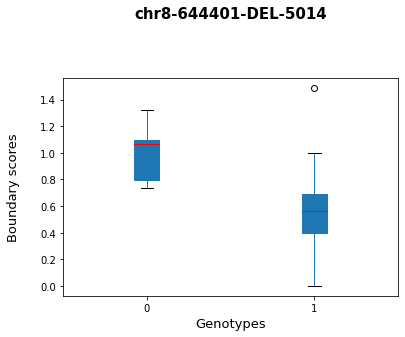

In [212]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Boundary scores', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('chr8-644401-DEL-5014', pad=60, fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, 'chr6-130293639-INS-295')

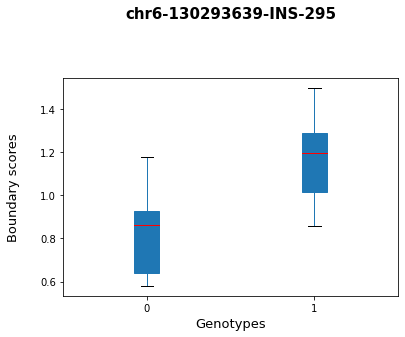

In [222]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Boundary scores', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('chr6-130293639-INS-295', pad=60, fontsize = 15, fontweight = 'bold')

##  SVs that overlapped with SV-eQTLs and SV-sQTLs' impact on gene expression levels

In [147]:
DEL_boundary_INFO_ID = list(all_DEL_boundary_3['INFO_ID'])
len(DEL_boundary_INFO_ID)

129

In [148]:
INS_boundary_INFO_ID = list(all_INS_boundary_3['INFO_ID'])
len(INS_boundary_INFO_ID)

131

In [149]:
eqtl_DEL_boundary = eqtl[eqtl['snp_id'].isin(DEL_boundary_INFO_ID)]
eqtl_DEL_boundary

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,type,length,Strand,feature_length,TSS,TES,ProteinCoding,TSS_Distance,TES_Distance,Distance_Cat
987,FLVCR1,chr1-212865885-DEL-169,3.660000e-48,0.521260,0.035747,7.240000e-33,1.0,212858275.0,212899363.0,430.0,...,DEL,169.0,+,6177.0,212858275.0,212899363.0,True,7693.0,-33395.0,In
1749,FLVCR1-DT,chr1-212865885-DEL-169,4.910000e-106,-0.951429,0.043502,3.050000e-24,1.0,212856604.0,212858138.0,430.0,...,DEL,169.0,-,942.0,212858138.0,212856604.0,False,-7830.0,-9364.0,Before
4373,PPIE,chr1-39784525-DEL-121,5.540000e-22,0.310023,0.032167,1.150000e-14,1.0,39738845.0,39765698.0,430.0,...,DEL,121.0,+,7819.0,39738845.0,39765698.0,True,45739.0,18886.0,After
7975,BMP8B,chr1-39784525-DEL-121,1.430000e-15,0.445218,0.055771,1.550000e-10,1.0,39757182.0,39788865.0,430.0,...,DEL,121.0,-,6289.0,39788865.0,39757182.0,True,4281.0,-27402.0,In
11770,ACADM,chr1-75885991-DEL-96,1.630000e-16,-0.261414,0.031700,2.030000e-08,1.0,75724347.0,75763679.0,430.0,...,DEL,96.0,+,2734.0,75724347.0,75763679.0,True,161691.0,122359.0,After
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829013,LOC107985486,chr21-29229496-DEL-340,2.760000e-05,0.417731,0.099635,3.054596e-02,21.0,29434202.0,29459965.0,430.0,...,DEL,340.0,+,2154.0,29434202.0,29459965.0,False,-204537.0,-230300.0,Before
829017,SPATC1L,chr21-46237438-DEL-1322,1.070000e-05,0.179812,0.040834,3.061796e-02,21.0,46161148.0,46185163.0,430.0,...,DEL,1322.0,-,3303.0,46185163.0,46161148.0,True,-52935.0,-76950.0,Before
838399,MTMR3,chr22-29818404-DEL-56,1.710000e-10,0.148337,0.023231,1.799450e-04,22.0,29883165.0,30030868.0,430.0,...,DEL,56.0,+,10773.0,29883165.0,30030868.0,True,-64734.0,-212437.0,Before
847408,BID,chr22-17801131-DEL-322,6.030000e-06,0.115735,0.025574,1.885531e-02,22.0,17734140.0,17774665.0,430.0,...,DEL,322.0,-,2660.0,17774665.0,17734140.0,True,-26626.0,-67151.0,Before


In [150]:
eqtl_DEL_boundary_gene = list(eqtl_DEL_boundary['feature_id'])
len(eqtl_DEL_boundary_gene)

206

In [151]:
eqtl_INS_boundary = eqtl[eqtl['snp_id'].isin(INS_boundary_INFO_ID)]
eqtl_INS_boundary

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,type,length,Strand,feature_length,TSS,TES,ProteinCoding,TSS_Distance,TES_Distance,Distance_Cat
2979,CCDC163,chr1-45497763-INS-354,1.480000e-70,-0.815218,0.045906,1.380000e-17,1.0,45493863.0,45500111.0,430.0,...,INS,354.0,-,2264.0,45500111.0,45493863.0,True,2172.0,-4076.0,In
4867,PHACTR4,chr1-28391141-INS-789,2.860000e-23,0.187506,0.018869,8.000000e-14,1.0,28369554.0,28500369.0,430.0,...,INS,789.0,+,7134.0,28369554.0,28500369.0,True,21980.0,-108835.0,In
8189,PHACTR4,chr1-28353524-INS-5732,5.300000e-18,0.175167,0.020258,2.160000e-10,1.0,28369554.0,28500369.0,430.0,...,INS,5732.0,+,7134.0,28369554.0,28500369.0,True,-13165.0,-143980.0,Before
8871,CACNA1E,chr1-181426705-INS-80,3.400000e-41,-0.594296,0.044210,6.780000e-10,1.0,181317712.0,181808084.0,430.0,...,INS,80.0,+,17446.0,181317712.0,181808084.0,True,109032.0,-381340.0,In
13782,LOC112268222,chr1-20965635-INS-54,3.610000e-14,-0.271134,0.035797,1.190000e-07,1.0,20735360.0,20744479.0,430.0,...,INS,54.0,+,6244.0,20735360.0,20744479.0,False,230301.0,221182.0,After
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808120,SNX5,chr20-17962612-INS-60,5.430000e-10,0.230846,0.037197,5.510000e-05,20.0,17941596.0,17968991.0,430.0,...,INS,60.0,-,2542.0,17968991.0,17941596.0,True,6350.0,-21045.0,In
823171,YBEY,chr21-46228816-INS-72,1.360000e-09,-0.453674,0.074857,9.360000e-05,21.0,46286056.0,46314188.0,430.0,...,INS,72.0,+,7319.0,46286056.0,46314188.0,True,-57205.0,-85337.0,Before
826233,PCNT,chr21-46228816-INS-72,4.510000e-07,0.197173,0.039075,4.304816e-03,21.0,46324122.0,46445769.0,430.0,...,INS,72.0,+,11243.0,46324122.0,46445769.0,True,-95271.0,-216918.0,Before
827902,SNORD159,chr21-46228816-INS-72,6.060000e-06,0.222479,0.049175,1.560817e-02,21.0,46194090.0,46194159.0,430.0,...,INS,72.0,-,70.0,46194159.0,46194090.0,False,-34692.0,-34761.0,Before


In [152]:
eqtl_INS_boundary_gene = list(eqtl_INS_boundary['feature_id'])
len(eqtl_INS_boundary_gene)

234

In [154]:
gene_expression = pd.read_csv('directory/featureCounts_v2.genes.counts.edgeR.log.txt', sep='\t', header=0)
gene_expression_DEL_boundary = gene_expression.filter(items = eqtl_DEL_boundary_gene, axis=0)
gene_expression_INS_boundary = gene_expression.filter(items = eqtl_INS_boundary_gene, axis=0)

In [156]:
sample = ['HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650']
gene_expression_DEL_boundary_sample = gene_expression_DEL_boundary.filter(regex='|'.join(sample), axis=1)
gene_expression_INS_boundary_sample = gene_expression_INS_boundary.filter(regex='|'.join(sample), axis=1)
## only keep the first 7 characters of the columns name
gene_DEL_boundary_sample_rename = gene_expression_DEL_boundary_sample.rename(columns = lambda x : str(x)[:7])
gene_INS_boundary_sample_rename = gene_expression_INS_boundary_sample.rename(columns = lambda x : str(x)[:7])
gene_DEL_boundary_sample_rename_new =  gene_DEL_boundary_sample_rename.reset_index().rename(columns={'index': 'gene'})
gene_INS_boundary_sample_rename_new =  gene_INS_boundary_sample_rename.reset_index().rename(columns={'index': 'gene'})

In [157]:
INFO_ID = list(eqtl_DEL_boundary.iloc[:, 1])
len(INFO_ID)

206

In [158]:
gene_DEL_boundary_sample_rename_new['INFO_ID'] = INFO_ID 
gene_DEL_boundary_sample_rename_new = gene_DEL_boundary_sample_rename_new[[
'gene','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [164]:
gene_DEL_boundary_sample_rename_new

,gene,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,FLVCR1,chr1-212865885-DEL-169,3.182254,3.858130,3.932356,4.034466,4.270000,4.351831,4.431723,3.956645,...,3.921663,4.221993,3.408906,3.539108,3.890885,3.744582,4.802965,3.806513,4.168370,3.757917
1,FLVCR1-DT,chr1-212865885-DEL-169,4.518435,3.404420,3.642523,2.844885,3.626369,1.960139,2.295803,4.293866,...,2.293523,2.094400,3.696923,2.024030,2.049470,3.508248,2.480069,3.538979,2.055530,3.763058
2,PPIE,chr1-39784525-DEL-121,3.668282,3.407074,3.255870,2.914253,3.649996,3.568987,3.513139,3.268611,...,3.543504,3.258546,3.217657,3.518713,3.221399,3.645012,3.230408,3.458495,3.286507,3.513547
3,BMP8B,chr1-39784525-DEL-121,1.346056,3.113188,0.909313,0.764157,1.644701,2.978213,2.548648,0.812898,...,2.573617,1.051142,0.707566,1.861994,0.720842,2.277642,0.945804,1.326763,1.873221,1.354860
4,ACADM,chr1-75885991-DEL-96,7.659752,6.986347,7.571155,6.392741,7.034892,7.393530,7.225765,7.183129,...,7.167314,7.200600,6.908376,6.992673,7.096132,7.229293,7.180315,7.422848,7.307422,7.416706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,LOC107985486,chr21-29229496-DEL-340,1.115215,1.295715,1.496729,1.767033,1.275271,1.893257,1.303829,1.612678,...,1.206924,1.972804,1.704443,1.035015,0.734101,1.332520,1.364410,0.819892,1.856135,1.211973
202,SPATC1L,chr21-46237438-DEL-1322,2.943686,2.612045,0.010228,1.605410,2.403508,0.023952,2.300385,2.704641,...,2.948355,2.331592,1.912804,0.986204,2.713714,2.912182,1.394888,1.451777,2.603112,2.618411
203,MTMR3,chr22-29818404-DEL-56,3.472218,3.325693,3.242955,3.235089,3.074033,3.210008,3.292598,3.540423,...,3.220239,3.414060,3.276268,3.242379,3.332961,3.241041,3.245315,3.041771,3.248955,3.146964
204,BID,chr22-17801131-DEL-322,5.627270,5.650510,4.753292,5.835554,5.279265,5.024391,5.445897,5.252653,...,5.790277,5.345479,5.045839,6.303580,5.633465,5.712423,4.074824,5.930617,5.294040,5.298250


In [165]:
INFO_ID = list(eqtl_INS_boundary.iloc[:, 1])
len(INFO_ID)

234

In [166]:
gene_INS_boundary_sample_rename_new['INFO_ID'] = INFO_ID 
gene_INS_boundary_sample_rename_new = gene_INS_boundary_sample_rename_new[[
'gene','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [167]:
gene_INS_boundary_sample_rename_new

,gene,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,CCDC163,chr1-45497763-INS-354,2.451951,2.138003,2.807306,1.613811,2.671173,2.302246,2.088805,2.481762,...,2.641385,2.629090,2.677383,2.596948,2.678364,2.705544,1.964997,2.047240,2.476094,2.718013
1,PHACTR4,chr1-28391141-INS-789,4.491272,4.217001,4.178195,3.461788,4.491741,4.680788,4.426762,4.574973,...,4.260489,4.314123,4.295036,4.073195,4.007689,4.291202,4.599869,4.056128,4.484748,4.196738
2,PHACTR4,chr1-28353524-INS-5732,4.491272,4.217001,4.178195,3.461788,4.491741,4.680788,4.426762,4.574973,...,4.260489,4.314123,4.295036,4.073195,4.007689,4.291202,4.599869,4.056128,4.484748,4.196738
3,CACNA1E,chr1-181426705-INS-80,1.900358,1.388378,1.308231,4.046088,2.146520,1.129993,2.901701,2.059619,...,1.898706,1.777487,1.821952,3.319179,1.423579,2.537876,2.807434,2.452531,1.140472,2.241195
4,LOC112268222,chr1-20965635-INS-54,0.221737,0.560986,0.728376,0.924782,0.649720,0.746287,0.550084,0.787345,...,0.615266,0.612378,0.562446,0.507328,0.630547,0.667308,0.660496,0.727473,0.891692,0.743082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,SNX5,chr20-17962612-INS-60,7.070021,6.893876,6.725908,6.663037,7.136712,6.884808,7.093256,6.926468,...,7.185799,7.009653,6.746555,7.072159,7.527851,7.138261,6.862435,7.383370,7.033434,7.182144
230,YBEY,chr21-46228816-INS-72,2.535677,2.445938,2.301640,1.793784,2.089031,2.247116,2.031774,2.297758,...,2.285176,2.371383,2.255019,2.111588,2.344864,2.558223,2.332461,2.055706,2.396808,2.240534
231,PCNT,chr21-46228816-INS-72,3.939148,3.951456,3.669867,3.852912,4.194509,3.827250,4.244478,4.132580,...,4.112309,3.640094,3.595115,4.004846,3.884608,3.757760,3.722819,3.788674,4.147031,4.296724
232,SNORD159,chr21-46228816-INS-72,2.075136,2.999956,1.591849,2.968476,2.175307,1.834834,2.210714,3.278098,...,1.991299,3.025290,1.437202,2.316186,3.049438,2.013004,3.571077,3.051801,2.865098,2.912416


In [174]:
### test for genotypes 0 and 1
pvalue= []

for i in range(0, len(gene_DEL_boundary_sample_rename_new)):
    DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == gene_DEL_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
    gene_expression_list = gene_DEL_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
    
    df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')
    
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        print (p)
        
    except KeyError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
gene_DEL_boundary_sample_rename_new['pvalue_0_1'] = pvalue

0.04144620354742847
0.00012968926348923656
0.07495095293722295
0.038787025331647754
0.7113363524347506
0.03692307692307692
0.8107023411371235
0.4285493911123202
0.07495095293722295
0.02904546254660671
0.8490886687683028
0.1484442465597399
0.02140660255076731
0.3161204013377926
0.7988050985224225
0.5399528355612621
0.7211036271576049
0.15974012257765116
0.19608839672912898
0.2225675441801435
0.08689051223376167
0.8740778672128787
0.02140660255076731
0.9999999999999998
0.9793696409930089
0.055041045910611125
0.8200900835602679
0.6999435347261433
0.8596162647421228
0.9550015202189113
0.35512313773183335
0.27398096855358933
0.7596622384211562
0.8822742474916387
0.6139686400555965
0.4129979187591249
0.8971264567980143
0.6307851765948413
0.09846153846153846
0.17590337243857232
0.7045066630771302
0.24278426244639736
0.09846153846153846
0.8596162647421228
0.9798432338962693
0.11792600722739369
0.11792600722739369
0.9182608695652171
0.25846153846153846
0.11792600722739369
0.3474456651169533
0.6

In [169]:
#gene_DEL_boundary_sample_rename_new.to_csv('directory/gene_DEL_flank_boundary_26sample_genotype_pvalue_only01.bed', index = False, sep='\t', header=True)

In [ ]:
### working on insertion

In [175]:
### test for genotypes 0 and 1
pvalue= []

for i in range(0, len(gene_INS_boundary_sample_rename_new)):
    INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == gene_INS_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
    gene_expression_list = gene_INS_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
    
    df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')
    
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        print (p)
        
    except KeyError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
gene_INS_boundary_sample_rename_new['pvalue_0_1'] = pvalue

0.012771674415233442
0.03104341613427628
0.36215776012922335
0.019098705843893622
0.5966952041093918
0.4613165095773791
0.5169399452344668
0.5672829687474997
0.23115462273626225
0.04144620354742847
0.14478395477184008
0.014847013264027667
0.9793696409930089
0.2035417187469954
0.8563552210341819
0.6672539010323368
0.27398096855358933
0.8563552210341819
0.8994752373753585
0.053716205721859235
0.07569069240088219
0.026750958020307865
0.0169323206071086
0.7045066630771302
0.47422652391356124
0.9593578181140436
0.5399528355612621
0.26083115968699494
0.40948616600790516
0.39136666268177916
0.5511927835255337
0.11950200828919365
0.8861538461538463
0.8326261381638956
0.9578761741690804
0.1119732441471572
0.06873686281412758
0.15384615384615385
0.8357729227294444
0.6511766494375189
0.0035785953177257528
0.19998271751132163
0.035165703861356035
0.012307692307692308
0.055041045910611125
0.17244147157190637
0.1814514090028964
0.4967740954697476
0.0458584893367502
0.07495095293722295
0.006923511271

In [171]:
#gene_INS_boundary_sample_rename_new.to_csv('directory/gene_INS_flank_boundary_26sample_genotype_pvalue_only01.bed', index = False, sep='\t', header=True)

In [ ]:
## visualization of chr8-644401-DEL-5014 and chr6-130293639-INS-295

In [238]:
#gene_DEL_boundary_sample_rename_new.iloc[92, :]
gene_INS_boundary_sample_rename_new.iloc[83, :]

gene                        TMEM200A
INFO_ID       chr6-130293639-INS-295
NA18534                     2.303405
NA18939                     2.650858
NA19036                     3.043825
NA19240                     3.450595
NA19650                     2.748188
NA19983                     2.839752
NA20509                     2.489334
NA20847                     3.862035
HG00096                     3.403879
HG00171                     3.061517
HG00514                     1.785698
HG00733                      3.29414
HG00864                     2.738436
HG01114                     3.239487
HG01505                      3.43963
HG01573                     3.268887
HG01596                     2.909499
HG02011                     3.410804
HG02018                     2.712212
HG02492                     2.924135
HG02587                     4.531084
HG03009                     3.361059
HG03065                     3.611612
HG03371                     3.634799
HG03683                     1.505742
H

In [240]:
#gene_expression_list = gene_DEL_boundary_sample_rename_new.iloc[92, 2:28].values.tolist()
gene_expression_list = gene_INS_boundary_sample_rename_new.iloc[83, 2:28].values.tolist()
gene_expression_list

[2.30340476073573,
 2.65085755551484,
 3.04382523690216,
 3.4505953634487,
 2.7481883104428,
 2.83975151819602,
 2.48933391041634,
 3.86203491936682,
 3.40387936235114,
 3.06151733361349,
 1.78569828915463,
 3.29414005830355,
 2.73843560682129,
 3.23948677709555,
 3.43963039066819,
 3.26888712467379,
 2.90949882334465,
 3.41080352952766,
 2.71221206588382,
 2.92413520427654,
 4.53108424885454,
 3.36105875566637,
 3.61161186286674,
 3.63479945384776,
 1.50574216696289,
 3.21073158323052]

In [244]:
#DEL_boundary_genotype_gene = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == gene_DEL_boundary_sample_rename_new.loc[92,'INFO_ID']]
INS_boundary_genotype_gene = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == gene_INS_boundary_sample_rename_new.loc[83,'INFO_ID']]
INS_boundary_genotype_gene

,CHROM,START_POS,END_POS,TYPE,LEN,FILTER,INFO_ID,FORMAT,NA18534,NA18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
228,chr6,130293639,130293639,INS,295,PASS,chr6-130293639-INS-295,GT:GQ,1,1,...,1,1,1,0,0,0,0,0,1,0


In [246]:
#DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == gene_DEL_boundary_sample_rename_new.loc[92,'INFO_ID']].iloc[:,8:35]
INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == gene_INS_boundary_sample_rename_new.loc[83,'INFO_ID']].iloc[:,8:34]
INS_boundary_genotype_all

,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,HG00096,HG00171,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
228,1,1,1,1,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,0


In [247]:
#genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
genotypes_list

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]

In [248]:
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_expression' : gene_expression_list})
df_new = df.assign(expression=df.groupby('genotypes').cumcount()).pivot('expression','genotypes','gene_expression')

In [249]:
df_new

genotypes,0,1
expression,,
0,2.839752,2.303405
1,2.489334,2.650858
2,3.862035,3.043825
3,3.403879,3.450595
4,3.061517,2.748188
5,3.294140,1.785698
6,3.439630,2.738436
7,3.268887,3.239487
8,2.924135,2.909499


Text(0.5, 1.0, 'ERICH1')

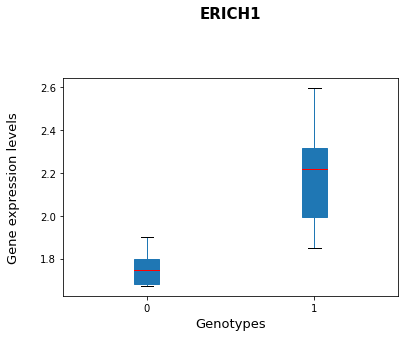

In [582]:
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene expression levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('ERICH1', pad=60, fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, 'TMEM200A')

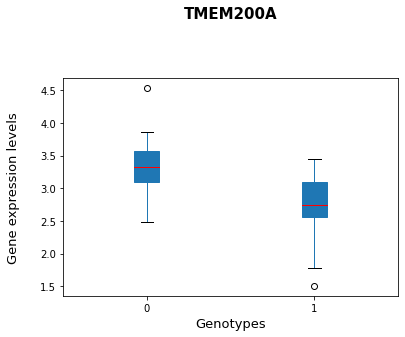

In [250]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene expression levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('TMEM200A', pad=60, fontsize = 15, fontweight = 'bold')

## SVs' impact on gene splicing levels

In [251]:
sqtl_DEL_boundary = sqtl[sqtl['snp_id'].isin(DEL_boundary_INFO_ID)]
sqtl_DEL_boundary_feature = list(sqtl_DEL_boundary['feature_id'])

In [252]:
sqtl_DEL_boundary

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_group,feature_chromosome,feature_start,feature_end,...,alpha_param,beta_param,snp_chromosome,snp_position,call_rate,maf,hwe_p,QTL,type,length
841,1:212856996:212857766:clu_30033_-,chr1-212865885-DEL-169,2.555711e-75,0.961226,0.052343,6.922050e-49,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212856996:212857766:c...,DEL,169
1089,1:212857172:212857766:clu_30033_-,chr1-212865885-DEL-169,1.006103e-71,-0.955416,0.053349,1.855091e-46,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212857172:212857766:c...,DEL,169
1198,1:212856918:212857766:clu_30033_-,chr1-212865885-DEL-169,1.237719e-69,0.935380,0.053029,4.785481e-45,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212856918:212857766:c...,DEL,169
1523,1:212856921:212857766:clu_30033_-,chr1-212865885-DEL-169,1.063242e-66,0.918040,0.053211,4.587108e-43,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212856921:212857766:c...,DEL,169
3745,1:212854309:212857766:clu_30033_-,chr1-212865885-DEL-169,1.179435e-48,0.824945,0.056276,7.064096e-31,clu_30033_-,1,212836187,212857766,...,0.675394,1665.816464,1,212865884,1,0.468384,0.001828,chr1-212865885-DEL-169 1:212854309:212857766:c...,DEL,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079898,21:46442573:46445284:clu_9618_+,chr21-46237438-DEL-1322,6.830466e-08,0.300153,0.055630,1.329896e-03,clu_9618_+,21,46441084,46445398,...,0.779223,2702.057000,21,46237437,1,0.374707,0.148714,chr21-46237438-DEL-1322 21:46442573:46445284:c...,DEL,1322
1079997,21:46285394:46285803:clu_38361_-,chr21-46237438-DEL-1322,1.223988e-08,-0.350878,0.061597,1.455330e-03,clu_38361_-,21,46285394,46286151,...,0.603303,1345.970000,21,46237437,1,0.374707,0.148714,chr21-46237438-DEL-1322 21:46285394:46285803:c...,DEL,1322
1082180,21:29434369:29597570:clu_9429_+,chr21-29229496-DEL-340,7.277360e-08,-0.494945,0.091926,8.532518e-03,clu_9429_+,21,29329693,29597570,...,0.652337,7885.677000,21,29229495,1,0.121780,0.020130,chr21-29229496-DEL-340 21:29434369:29597570:cl...,DEL,340
1096626,22:29816073:29822335:clu_833_-,chr22-29818404-DEL-56,1.379702e-08,-0.346533,0.061054,2.183434e-04,clu_833_-,22,29816073,29822335,...,0.693426,331.273200,22,29818403,1,0.448478,0.240702,chr22-29818404-DEL-56 22:29816073:29822335:clu...,DEL,56


In [255]:
sqtl_INS_boundary = sqtl[sqtl['snp_id'].isin(INS_boundary_INFO_ID)]
sqtl_INS_boundary_feature = list(sqtl_INS_boundary['feature_id'])

In [256]:
sqtl_INS_boundary

,feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_group,feature_chromosome,feature_start,feature_end,...,alpha_param,beta_param,snp_chromosome,snp_position,call_rate,maf,hwe_p,QTL,type,length
3969,1:40040801:40041429:clu_13745_+,chr1-40059015-INS-307,1.241753e-45,1.208233,0.085215,1.598565e-29,clu_13745_+,1,40040783,40059337,...,0.695642,2820.883410,1,40059014,1,0.113583,0.809029,chr1-40059015-INS-307 1:40040801:40041429:clu_...,INS,307
5000,1:40041493:40059334:clu_13745_+,chr1-40059015-INS-307,2.209760e-41,1.119460,0.083080,1.446856e-26,clu_13745_+,1,40040783,40059337,...,0.695642,2820.883410,1,40059014,1,0.113583,0.809029,chr1-40059015-INS-307 1:40041493:40059334:clu_...,INS,307
7012,1:40041493:40059337:clu_13745_+,chr1-40059015-INS-307,9.669553e-35,1.097859,0.089295,6.028765e-22,clu_13745_+,1,40040783,40059337,...,0.695642,2820.883410,1,40059014,1,0.113583,0.809029,chr1-40059015-INS-307 1:40041493:40059337:clu_...,INS,307
7535,1:45495166:45499345:clu_28892_-,chr1-45497763-INS-354,6.443738e-28,0.803894,0.073396,5.438593e-21,clu_28892_-,1,45495166,45499345,...,0.852627,2486.919966,1,45497762,1,0.259953,0.101769,chr1-45497763-INS-354 1:45495166:45499345:clu_...,INS,354
9787,1:45495545:45499345:clu_28892_-,chr1-45497763-INS-354,8.069521e-24,0.777269,0.077242,1.695521e-17,clu_28892_-,1,45495166,45499345,...,0.852627,2486.919966,1,45497762,1,0.259953,0.101769,chr1-45497763-INS-354 1:45495545:45499345:clu_...,INS,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058698,20:17957037:17968700:clu_21243_-,chr20-17962612-INS-60,1.694216e-11,-0.621318,0.092318,4.738093e-06,clu_21243_-,20,17957037,17968700,...,0.764674,5784.344000,20,17962611,1,0.151054,0.575318,chr20-17962612-INS-60 20:17957037:17968700:clu...,INS,60
1080518,21:46367139:46385832:clu_9610_+,chr21-46228816-INS-72,1.179041e-07,-0.521235,0.098407,2.380302e-03,clu_9610_+,21,46367139,46385832,...,0.708046,1464.730000,21,46228815,1,0.104216,0.015204,chr21-46228816-INS-72 21:46367139:46385832:clu...,INS,72
1080589,21:46295098:46296162:clu_9604_+,chr21-46228816-INS-72,6.552416e-08,0.542578,0.100421,2.485310e-03,clu_9604_+,21,46286988,46296162,...,0.703112,2633.161000,21,46228815,1,0.104216,0.015204,chr21-46228816-INS-72 21:46295098:46296162:clu...,INS,72
1083430,22:45171152:45171600:clu_16418_+,chr22-45166719-INS-125,2.972476e-87,-1.261095,0.063691,6.826363e-62,clu_16418_+,22,45168246,45171600,...,0.734952,1781.177000,22,45166718,1,0.221311,0.261122,chr22-45166719-INS-125 22:45171152:45171600:cl...,INS,125


In [257]:
splicing_ratio = pd.read_csv('/data/home/tun53987/Hi-C/TAD_SV_qtl/LCL_perind.counts.qqnorm.CovariatesRemoved.cs.txt', sep='\t', header = 0, index_col=0)

In [258]:
splicing_ratio

,HG01505_GT20.08870_CTTGGTAT.CCAAGTCC_S13_L002,ERR188225,ERR188319,ERR188442,ERR188338,ERR188227,ERR188388,ERR188246,ERR188248,ERR188243,...,ERR188378,ERR188438,ERR188086,ERR188166,ERR188316,ERR188113,ERR188231,ERR188401,ERR188328,ERR188208
1:15947:16607:clu_28216_-,1.305044,1.393594,1.120643,1.454387,-0.734439,-0.950881,-0.166188,-1.531030,0.070317,0.538749,...,-0.215796,0.235676,0.805935,-0.476562,1.747705,-1.391309,-1.261412,0.273684,1.323672,0.153846
1:16310:16607:clu_28216_-,-0.802532,-1.736577,-0.795335,-1.764662,0.560568,1.152540,0.259199,1.306532,0.333197,-0.760520,...,0.578430,-0.355609,-1.129707,0.537739,-2.254430,1.121073,1.623199,0.216493,-1.581153,-0.340936
1:17055:17233:clu_28217_-,-1.479601,1.113143,1.005401,1.047445,0.666781,0.233550,0.971575,-0.639580,1.127355,-1.991327,...,1.047504,0.729925,0.030728,0.078015,0.359826,0.482407,0.035123,0.090868,0.446813,0.388141
1:17055:17606:clu_28217_-,1.312765,-0.030514,-1.444060,-1.029776,-0.740053,-0.292770,0.049098,-0.550698,-0.977998,1.968474,...,-0.979777,-0.930437,-1.012941,0.443829,0.310587,-1.079565,-0.826834,0.033047,1.510823,0.277269
1:17055:17915:clu_28217_-,2.305001,-0.867150,-0.862317,-0.078955,0.078869,-0.921706,0.564574,-0.061939,1.162044,-0.724917,...,0.091201,-0.818234,-1.414591,-0.038191,0.473560,-1.269791,-0.115176,-1.083777,0.452475,-0.705823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9:137782397:137790848:clu_18093_+,0.522056,1.415752,0.872317,0.178644,0.701933,1.777767,-1.736067,-1.674483,-0.310667,0.862084,...,0.488637,-1.168620,1.807166,-1.611161,0.158289,0.424960,-0.890559,0.347851,-1.629510,-1.405441
9:137790970:137792055:clu_18094_+,0.730951,-0.122214,-0.890275,-0.007186,-1.371613,-1.143209,-1.460725,-1.761141,1.319746,-0.345344,...,-0.656720,-0.385618,-1.922587,-1.782480,0.925073,1.098855,-0.737634,0.837171,-0.006964,0.907953
9:137790970:137798813:clu_18094_+,-0.828754,0.319232,0.521832,0.095080,0.981043,1.110182,1.247140,1.389771,-1.664995,0.476712,...,0.697371,0.530841,1.781770,1.351154,-0.697303,-1.333975,0.903652,-0.469929,0.069873,-1.287937
9:137800984:137802857:clu_18095_+,0.252568,0.193965,0.000805,-0.625663,-0.963092,0.881985,-1.969562,1.210591,1.771734,-0.246392,...,0.104182,-1.080589,-0.284014,-0.518766,-0.573151,1.720886,-0.580316,-0.310139,0.126217,-2.186904


In [259]:
splicing_DEL_boundary = splicing_ratio.filter(items = sqtl_DEL_boundary_feature, axis=0)
splicing_INS_boundary = splicing_ratio.filter(items = sqtl_INS_boundary_feature, axis=0)

In [260]:
sample = ['HG01114','HG03065','HG01505','HG02492','HG00096','HG03732','HG01573','NA20509','HG02587','HG01596','NA19983','HG00864','HG02011','HG00733','HG03371','NA19036','NA20847','HG00171','NA18534','NA18939','HG03683','NA19240','HG03009','HG02018','HG00514','NA19650']
splicing_DEL_boundary_sample = splicing_DEL_boundary.filter(regex='|'.join(sample), axis=1)
splicing_INS_boundary_sample = splicing_INS_boundary.filter(regex='|'.join(sample), axis=1)
## only keep the first 7 characters of the columns name
splicing_DEL_boundary_sample_rename = splicing_DEL_boundary_sample.rename(columns = lambda x : str(x)[:7])
splicing_INS_boundary_sample_rename = splicing_INS_boundary_sample.rename(columns = lambda x : str(x)[:7])

In [261]:
splicing_DEL_boundary_sample_rename_new = splicing_DEL_boundary_sample_rename.reset_index().rename(columns={'index': 'feature_id'})

In [262]:
splicing_DEL_boundary_sample_rename_new

,feature_id,HG01505,HG02018,HG00864,NA19036,HG00733,NA19240,HG01114,HG02011,HG03065,...,HG03009,HG03732,HG02492,HG00514,HG02587,HG01573,NA18534,HG00171,HG03683,NA18939
0,1:212856996:212857766:clu_30033_-,-0.398574,-0.422307,-0.453644,-0.407947,-0.068488,-0.136781,-0.339556,0.998201,0.238248,...,-0.305134,-0.549031,-0.186268,-0.067811,0.847136,1.363797,-0.379954,-0.412164,0.046793,-0.482347
1,1:212857172:212857766:clu_30033_-,0.964692,1.090088,1.312998,0.979292,-1.369907,1.079246,0.751866,-1.518220,-1.319015,...,0.942965,1.253626,-1.457726,1.055560,-1.570456,-1.190269,1.043213,0.877176,-1.253971,1.162674
2,1:212856918:212857766:clu_30033_-,-0.524202,-0.810533,-1.012896,-0.846717,1.271520,-0.542582,-0.411379,1.051304,0.637549,...,-0.515186,-0.625252,1.585839,-0.985064,0.549895,0.562437,-0.486887,-0.021293,0.090004,-0.590946
3,1:212856921:212857766:clu_30033_-,-0.643204,-0.957900,-0.914469,-0.662620,-0.216360,-0.706197,-0.462359,0.765595,0.405553,...,-0.259034,-0.746398,1.534683,-0.449425,1.821402,1.128407,-0.717488,-0.664255,-0.023794,-0.462139
4,1:212854309:212857766:clu_30033_-,-0.713800,-0.694678,-0.725045,-0.405330,0.568073,-0.866536,-0.063553,0.696259,0.729437,...,-0.607719,-0.961752,0.186378,-0.782692,0.140423,1.029577,-0.678931,-0.453190,2.984369,-0.627375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,21:46442573:46445284:clu_9618_+,-1.388613,0.742745,0.026842,-0.301351,-0.205632,0.046295,-0.489980,-0.583922,0.784579,...,-0.412053,-0.958738,0.539953,-0.934900,0.079658,-0.403761,0.943260,-0.190889,-0.086443,0.449333
404,21:46285394:46285803:clu_38361_-,0.832755,-0.053030,0.045878,0.009864,-0.071036,0.302086,-0.233855,0.090175,-0.307446,...,-0.337730,0.416324,0.285174,-0.150430,0.230767,0.005184,-0.530197,-0.067283,0.565432,-0.067908
405,21:29434369:29597570:clu_9429_+,-0.116262,0.027200,0.160603,-0.090593,-0.014720,-0.124749,-0.018340,0.128173,0.485596,...,-0.137723,0.018245,0.152015,-0.135999,0.088499,-0.290584,0.059925,0.266648,0.517322,0.642356
406,22:29816073:29822335:clu_833_-,1.082003,0.259365,-0.704524,0.279807,-0.792598,-0.067133,-1.130751,0.989318,1.029054,...,0.413682,-0.574896,0.162504,0.096277,-1.612470,-2.202263,0.876391,0.861384,-1.419155,1.110620


In [263]:
splicing_INS_boundary_sample_rename_new = splicing_INS_boundary_sample_rename.reset_index().rename(columns={'index': 'feature_id'})

In [264]:
splicing_INS_boundary_sample_rename_new

,feature_id,HG01505,HG02018,HG00864,NA19036,HG00733,NA19240,HG01114,HG02011,HG03065,...,HG03009,HG03732,HG02492,HG00514,HG02587,HG01573,NA18534,HG00171,HG03683,NA18939
0,1:40040801:40041429:clu_13745_+,0.506750,-1.245359,0.368954,0.626138,0.656988,-0.178705,0.721875,0.370463,-0.463988,...,0.146110,1.011781,0.094034,0.016830,0.917442,-0.712661,-0.689828,-0.448639,-0.804290,-4.090391
1,1:40041493:40059334:clu_13745_+,0.065656,-1.172471,0.656595,0.402459,-0.283865,-0.000158,0.653535,1.054313,-0.891179,...,0.812330,1.043306,0.706166,0.380083,0.731472,-0.479773,-1.111080,0.175499,-1.178145,-4.783336
2,1:40041493:40059337:clu_13745_+,0.044509,-0.795541,0.196422,0.281160,0.295666,0.088002,0.245726,-0.253376,-0.549710,...,0.448370,1.376743,0.300902,-0.131351,0.944819,-1.024280,-1.061305,0.277907,0.153736,-4.499767
3,1:45495166:45499345:clu_28892_-,-0.255925,-0.833058,-0.709050,-0.870622,-0.075860,-0.328232,-0.433260,-0.714337,-0.485894,...,-0.812819,-0.182443,-0.815077,0.417361,0.389508,1.042613,-0.584336,0.466880,0.476267,-0.690839
4,1:45495545:45499345:clu_28892_-,0.120775,0.339627,1.597383,0.206488,-0.646000,2.152950,-0.786766,0.596656,-0.926154,...,-0.740054,-0.037253,-0.448690,0.599063,-1.211064,-0.453009,-0.494622,0.645504,-0.401448,0.399963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,20:17957037:17968700:clu_21243_-,0.724396,-0.602832,-0.602493,-0.512720,0.910079,-0.046918,-0.179947,-0.505334,-0.238887,...,0.088037,-0.446944,-1.035885,0.650369,0.288925,0.072799,0.218972,-0.472903,-0.591710,-0.350492
452,21:46367139:46385832:clu_9610_+,-0.425166,1.647693,-0.169991,0.445602,-0.408199,-0.351494,-0.538221,-0.224429,0.979740,...,1.260196,-0.795493,-0.538716,-0.772050,-0.893341,-0.892197,-0.352224,0.981710,1.858457,0.723160
453,21:46295098:46296162:clu_9604_+,-0.427625,-0.615083,-0.624581,0.386742,0.038278,1.974020,-0.084345,-0.526649,1.483647,...,0.334658,-0.059161,-0.530774,0.988810,-0.746350,-0.114172,0.178621,-0.618883,-0.436026,-0.714946
454,22:45171152:45171600:clu_16418_+,-1.101511,0.163236,1.122087,-1.073997,-0.028077,0.298772,-1.078012,0.923304,-1.085933,...,0.296197,0.451719,0.964336,1.240152,1.073830,-0.863420,0.670943,-1.089862,0.421009,0.112200


In [266]:
splicing_DEL_boundary_sample_rename_new['INFO_ID'] = INFO_ID 
splicing_DEL_boundary_sample_rename_new = splicing_DEL_boundary_sample_rename_new[[
'feature_id','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [267]:
splicing_DEL_boundary_sample_rename_new

,feature_id,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,1:212856996:212857766:clu_30033_-,chr1-212865885-DEL-169,-0.379954,-0.482347,-0.407947,-0.136781,-0.455290,-0.064905,0.163100,-0.509662,...,1.663440,0.998201,-0.422307,-0.186268,0.847136,-0.305134,0.238248,-0.453373,0.046793,-0.549031
1,1:212857172:212857766:clu_30033_-,chr1-212865885-DEL-169,1.043213,1.162674,0.979292,1.079246,1.039276,-0.921520,-1.541223,1.224434,...,-1.650310,-1.518220,1.090088,-1.457726,-1.570456,0.942965,-1.319015,1.250436,-1.253971,1.253626
2,1:212856918:212857766:clu_30033_-,chr1-212865885-DEL-169,-0.486887,-0.590946,-0.846717,-0.542582,-0.890016,0.444691,1.773205,-0.997720,...,1.238489,1.051304,-0.810533,1.585839,0.549895,-0.515186,0.637549,-0.894264,0.090004,-0.625252
3,1:212856921:212857766:clu_30033_-,chr1-212865885-DEL-169,-0.717488,-0.462139,-0.662620,-0.706197,-0.281594,0.251246,-0.535056,-0.869017,...,1.464868,0.765595,-0.957900,1.534683,1.821402,-0.259034,0.405553,-0.647578,-0.023794,-0.746398
4,1:212854309:212857766:clu_30033_-,chr1-212865885-DEL-169,-0.678931,-0.627375,-0.405330,-0.866536,-0.726154,1.157371,0.320011,-0.791798,...,0.666505,0.696259,-0.694678,0.186378,0.140423,-0.607719,0.729437,-0.667818,2.984369,-0.961752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,21:46442573:46445284:clu_9618_+,chr21-46237438-DEL-1322,0.943260,0.449333,-0.301351,0.046295,-0.480915,0.793730,-1.248494,0.627607,...,-1.105000,-0.583922,0.742745,0.539953,0.079658,-0.412053,0.784579,-1.215404,-0.086443,-0.958738
404,21:46285394:46285803:clu_38361_-,chr21-46237438-DEL-1322,-0.530197,-0.067908,0.009864,0.302086,0.306844,0.406688,0.958297,-0.753668,...,-0.547530,0.090175,-0.053030,0.285174,0.230767,-0.337730,-0.307446,-0.255781,0.565432,0.416324
405,21:29434369:29597570:clu_9429_+,chr21-29229496-DEL-340,0.059925,0.642356,-0.090593,-0.124749,0.058007,-0.010658,-0.026518,-0.094566,...,-0.092958,0.128173,0.027200,0.152015,0.088499,-0.137723,0.485596,-0.155554,0.517322,0.018245
406,22:29816073:29822335:clu_833_-,chr22-29818404-DEL-56,0.876391,1.110620,0.279807,-0.067133,0.666852,-0.044606,-0.582180,0.512425,...,1.129870,0.989318,0.259365,0.162504,-1.612470,0.413682,1.029054,-1.972372,-1.419155,-0.574896


In [269]:
splicing_INS_boundary_sample_rename_new['INFO_ID'] = INFO_ID 
splicing_INS_boundary_sample_rename_new = splicing_INS_boundary_sample_rename_new[[
'feature_id','INFO_ID', 'NA18534','NA18939','NA19036','NA19240','NA19650','NA19983','NA20509','NA20847','HG00096','HG00171','HG00514','HG00733','HG00864','HG01114','HG01505','HG01573','HG01596','HG02011','HG02018','HG02492','HG02587','HG03009','HG03065','HG03371','HG03683','HG03732'
    ]]

In [270]:
splicing_INS_boundary_sample_rename_new

,feature_id,INFO_ID,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
0,1:40040801:40041429:clu_13745_+,chr1-40059015-INS-307,-0.689828,-4.090391,0.626138,-0.178705,1.133742,-1.386517,0.971173,-1.154574,...,0.566694,0.370463,-1.245359,0.094034,0.917442,0.146110,-0.463988,0.787183,-0.804290,1.011781
1,1:40041493:40059334:clu_13745_+,chr1-40059015-INS-307,-1.111080,-4.783336,0.402459,-0.000158,1.155814,-0.974158,0.505427,-0.737630,...,0.583143,1.054313,-1.172471,0.706166,0.731472,0.812330,-0.891179,0.936782,-1.178145,1.043306
2,1:40041493:40059337:clu_13745_+,chr1-40059015-INS-307,-1.061305,-4.499767,0.281160,0.088002,0.797031,-1.443352,0.654078,-0.389657,...,0.602547,-0.253376,-0.795541,0.300902,0.944819,0.448370,-0.549710,0.676396,0.153736,1.376743
3,1:45495166:45499345:clu_28892_-,chr1-45497763-INS-354,-0.584336,-0.690839,-0.870622,-0.328232,-0.916103,0.852304,1.009828,0.325025,...,-0.894569,-0.714337,-0.833058,-0.815077,0.389508,-0.812819,-0.485894,-0.710008,0.476267,-0.182443
4,1:45495545:45499345:clu_28892_-,chr1-45497763-INS-354,-0.494622,0.399963,0.206488,2.152950,0.256737,0.122463,0.183430,-1.077193,...,0.068558,0.596656,0.339627,-0.448690,-1.211064,-0.740054,-0.926154,1.990685,-0.401448,-0.037253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,20:17957037:17968700:clu_21243_-,chr20-17962612-INS-60,0.218972,-0.350492,-0.512720,-0.046918,0.070051,0.197648,0.204881,-0.609429,...,0.541607,-0.505334,-0.602832,-1.035885,0.288925,0.088037,-0.238887,0.006360,-0.591710,-0.446944
452,21:46367139:46385832:clu_9610_+,chr21-46228816-INS-72,-0.352224,0.723160,0.445602,-0.351494,1.455854,-0.153178,-0.376385,-0.131939,...,0.404714,-0.224429,1.647693,-0.538716,-0.893341,1.260196,0.979740,0.249559,1.858457,-0.795493
453,21:46295098:46296162:clu_9604_+,chr21-46228816-INS-72,0.178621,-0.714946,0.386742,1.974020,-0.586641,0.465158,-0.462200,-0.383591,...,-0.000817,-0.526649,-0.615083,-0.530774,-0.746350,0.334658,1.483647,-0.657881,-0.436026,-0.059161
454,22:45171152:45171600:clu_16418_+,chr22-45166719-INS-125,0.670943,0.112200,-1.073997,0.298772,-0.998898,0.215100,-1.012480,-1.142979,...,1.454884,0.923304,0.163236,0.964336,1.073830,0.296197,-1.085933,-1.037014,0.421009,0.451719


In [271]:
### test for genotypes 0 and 1
pvalue= []
for i in range(0, len(splicing_DEL_boundary_sample_rename_new)):
    DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == splicing_DEL_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
    splicing_ratio_list = splicing_DEL_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'splicing_ratio' : splicing_ratio_list})
    
    df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','splicing_ratio')
    
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        print (p)
        
    except KeyError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
splicing_DEL_boundary_sample_rename_new['pvalue_0_1'] = pvalue

3.1063296644128517e-06
1.7343673959638423e-05
9.577849798606293e-05
9.577849798606293e-05
2.5109498120670552e-05
0.0006474108742247119
0.0182618297034773
0.015512633819269974
0.1020716583187979
0.676923076923077
0.3446153846153846
0.19608839672912898
0.007629898705413579
0.5672829687474997
0.012575250836120402
0.09049623145732985
0.5672829687474997
0.010835913312693499
0.027392909284819366
0.17724280296362674
0.5538461538461539
0.3565494372366092
0.004458877372459281
0.09524571538301516
0.7446153846153847
0.011041589988958411
0.02369301179369829
0.25846153846153846
0.9182608695652171
0.3050542572248051
0.038787025331647754
0.02140660255076731
0.3565494372366092
0.8639464882943141
0.8123076923076924
0.012575250836120402
0.024615384615384615
0.3446153846153846
0.676923076923077
0.8861538461538463
0.14350354451040948
0.49846153846153846
0.007243812856950561
0.00017343673959638423
0.02369301179369829
0.014993476707704734
0.006448222661710345
0.0003921741201321226
0.02369301179369829
0.0236

/home/tun53987/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [272]:
#splicing_DEL_boundary_sample_rename_new.to_csv('directory/splicing_DEL_flank_boundary_26sample_genotype_pvalue_only01.bed', index = False, sep='\t', header=True)

In [273]:
### test for genotypes 0 and 1
pvalue= []
for i in range(0, len(splicing_INS_boundary_sample_rename_new)):
    INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == splicing_INS_boundary_sample_rename_new.loc[i,'INFO_ID']].iloc[:,8:35]
    genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()
    splicing_ratio_list = splicing_INS_boundary_sample_rename_new.iloc[i, 2:28].values.tolist()

    df = pd.DataFrame({'genotypes' : genotypes_list,
                   'splicing_ratio' : splicing_ratio_list})
    
    df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','splicing_ratio')
    
    try:
        U, p = mannwhitneyu(x=df_new[0].dropna().tolist(), y=df_new[1].dropna().tolist(), method="exact", alternative = 'two-sided')
        print (p)
        
    except KeyError:
        p = 'NA'
        print (p)
    
    pvalue.append(p)
    
splicing_INS_boundary_sample_rename_new['pvalue_0_1'] = pvalue

1.2801843465459026e-06
1.2801843465459026e-06
1.5362212158550832e-05
0.7988050985224225
0.09726228812243082
0.33387959866220734
0.8402509470607465
0.09084725881199161
0.010168644116685577
0.18568851797011712
0.4483008672576582
0.15338345864661654
0.18568851797011712
0.33583389419841164
0.7623108282214488
0.03155590875674332
0.6866317327846471
0.11293252312366595
0.24278426244639736
0.2868578735842163
1.1295744234228552e-05
0.07226121569909429
0.2225675441801435
0.2868578735842163
0.1253989192931177
3.840553039637708e-05
0.8402509470607465
0.7623108282214488
0.48379408987835437
0.6498475087975694
0.36215776012922335
0.05680710728227219
0.36215776012922335
0.7241455300655731
0.07226121569909429
0.5114381862584851
0.03382766378862758
0.3565494372366092
0.0008224007786533026
0.7596622384211562
0.052643383000093184
0.7596622384211562
0.3217271192934135
0.17590337243857232
0.02016007952203941
0.6498475087975694
0.08689051223376167
0.7623108282214488
0.013116768814709318
0.0091141783240316
0.

/home/tun53987/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [274]:
#splicing_INS_boundary_sample_rename_new.to_csv('/home/tun53987/Hi-C/experiment_mergeall/mega/aligned/fanc_insulation/splicing_INS_flank_boundary_26sample_genotype_pvalue_only01.bed', index = False, sep='\t', header=True)

In [306]:
#splicing_DEL_boundary_sample_rename_new.iloc[201, :]
splicing_INS_boundary_sample_rename_new.iloc[206, :]

feature_id    6:130385236:130439348:clu_24586_+
INFO_ID                  chr6-130293639-INS-295
NA18534                                0.267463
NA18939                                0.252313
NA19036                                0.004427
NA19240                               -0.021482
NA19650                                0.139053
NA19983                                -0.07158
NA20509                               -0.063894
NA20847                               -0.183647
HG00096                                0.343535
HG00171                               -0.107138
HG00514                                0.305549
HG00733                               -0.131516
HG00864                                0.016414
HG01114                               -0.045058
HG01505                                0.124082
HG01573                               -0.060614
HG01596                                0.430655
HG02011                                -0.01876
HG02018                                0

In [307]:
#gene_splicing_list = splicing_DEL_boundary_sample_rename_new.iloc[214, 2:28].values.tolist()
gene_splicing_list = splicing_INS_boundary_sample_rename_new.iloc[206, 2:28].values.tolist()
gene_splicing_list

[0.267462950298596,
 0.252313070795821,
 0.0044272301944602,
 -0.0214818224152996,
 0.13905316918287,
 -0.0715796362511352,
 -0.0638944125913783,
 -0.18364738163435,
 0.343534587044389,
 -0.107137795031301,
 0.305549126899973,
 -0.131515837079997,
 0.0164139923211265,
 -0.0450584268661352,
 0.124082356296816,
 -0.0606137199143327,
 0.430654791279323,
 -0.01875986613336,
 0.259925697124385,
 -0.221717879960806,
 -0.0187411879105023,
 0.209584743724658,
 0.0491971015001853,
 -0.0066315295650273,
 0.0725898159747129,
 -0.16354912110109]

In [310]:
#DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == splicing_DEL_boundary_sample_rename_new.loc[214,'INFO_ID']]
INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == splicing_INS_boundary_sample_rename_new.loc[206,'INFO_ID']]

,CHROM,START_POS,END_POS,TYPE,LEN,FILTER,INFO_ID,FORMAT,NA18534,NA18939,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
228,chr6,130293639,130293639,INS,295,PASS,chr6-130293639-INS-295,GT:GQ,1,1,...,1,1,1,0,0,0,0,0,1,0


In [311]:
#DEL_boundary_genotype_all = DEL_boundary_genotype[DEL_boundary_genotype.loc[:,'INFO_ID'] == splicing_DEL_boundary_sample_rename_new.loc[214,'INFO_ID']].iloc[:,8:35]
INS_boundary_genotype_all = INS_boundary_genotype[INS_boundary_genotype.loc[:,'INFO_ID'] == splicing_INS_boundary_sample_rename_new.loc[206,'INFO_ID']].iloc[:,8:35]
INS_boundary_genotype_all

,NA18534,NA18939,NA19036,NA19240,NA19650,NA19983,NA20509,NA20847,HG00096,HG00171,...,HG01596,HG02011,HG02018,HG02492,HG02587,HG03009,HG03065,HG03371,HG03683,HG03732
228,1,1,1,1,1,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,0


In [312]:
#genotypes_list = DEL_boundary_genotype_all.iloc[0].values.tolist()
genotypes_list = INS_boundary_genotype_all.iloc[0].values.tolist()

In [313]:
df = pd.DataFrame({'genotypes' : genotypes_list,
                   'gene_splicing' : gene_splicing_list})

In [314]:
df_new = df.assign(splicing=df.groupby('genotypes').cumcount()).pivot('splicing','genotypes','gene_splicing')

In [315]:
df_new

genotypes,0,1
splicing,,
0,-0.071580,0.267463
1,-0.063894,0.252313
2,-0.183647,0.004427
3,0.343535,-0.021482
4,-0.107138,0.139053
5,-0.131516,0.305549
6,0.124082,0.016414
7,-0.060614,-0.045058
8,-0.221718,0.430655


In [316]:
#df_new.agg(["count", "min", "max", "median", "mean", "skew"])

Text(0.5, 1.0, '8:640834:668598:clu_8652_- (ERICH1)')

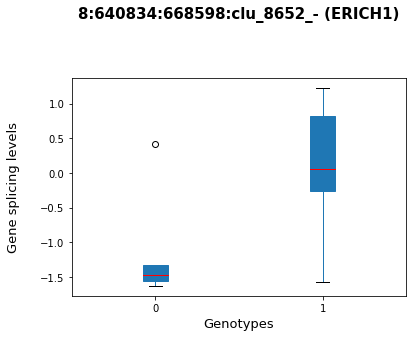

In [303]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene splicing levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('8:640834:668598:clu_8652_- (ERICH1)', pad=60, fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, '8:664676:668598:clu_8652_- (ERICH1)')

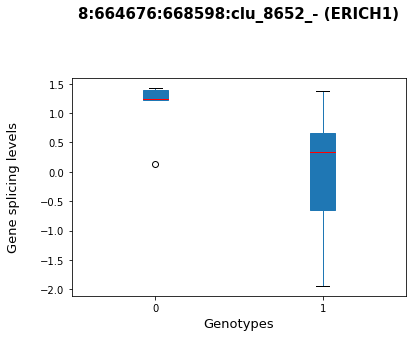

In [293]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene splicing levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('8:664676:668598:clu_8652_- (ERICH1)', pad=60, fontsize = 15, fontweight = 'bold')

Text(0.5, 1.0, '6:130385236:130439348:clu_24586_+ (TMEM200A)')

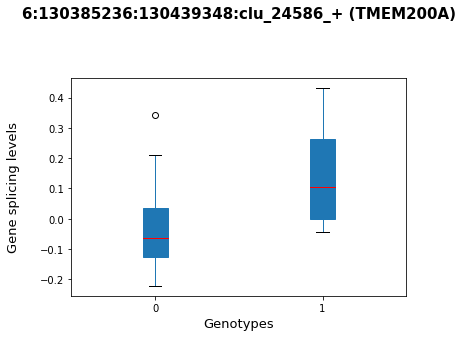

In [317]:
import matplotlib.pyplot as plt
fig = df_new.boxplot(column=[0, 1], grid=False, patch_artist = True, medianprops=dict(color='red'))
fig.set_ylabel('Gene splicing levels', fontsize = 13, labelpad=20)
fig.set_xlabel('Genotypes', fontsize=13)
fig.set_title('6:130385236:130439348:clu_24586_+ (TMEM200A)', pad=60, fontsize = 15, fontweight = 'bold')

In [322]:
intron2gene = pd.read_csv('/data/home/tun53987/Hi-C/TAD_SV_qtl/intron2gene.txt', sep='\t')
intron2gene[intron2gene['feature_id'] == '6:130385236:130439348:clu_24586_+']

,feature_id,start,end,gene_id,gene.start,gene.end,gene.strand
125420,6:130385236:130439348:clu_24586_+,130385236,130439348,TMEM200A,130366281,130443424,+
